In [1]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
data1 = loadmat('data1.mat')

In [2]:
F = data1['F_data']
X = data1['X_data']

In [3]:
F1 = F[:,:,1]
X1 = X[:,:,1]

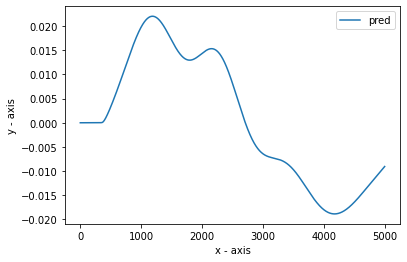

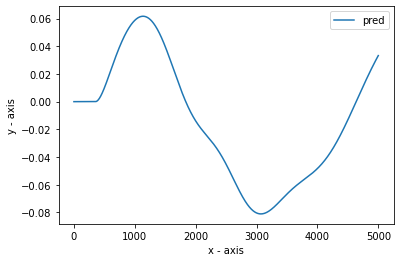

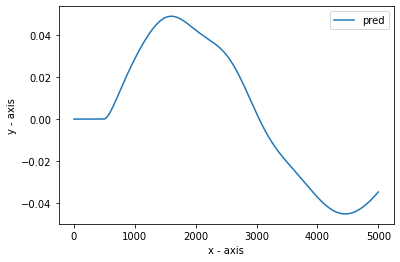

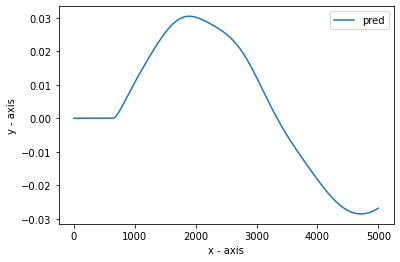

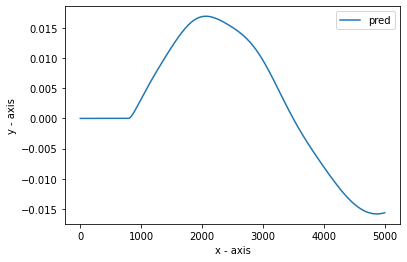

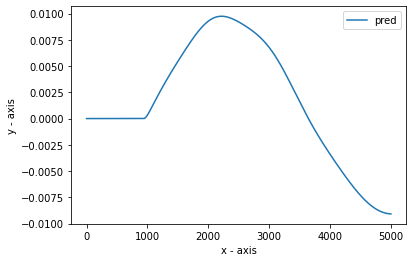

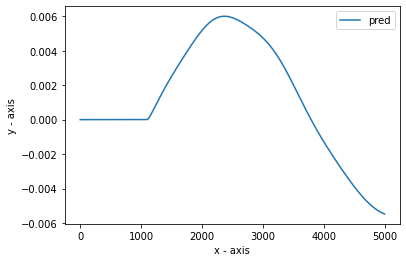

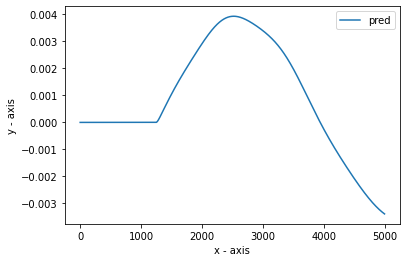

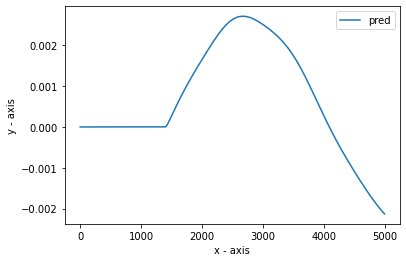

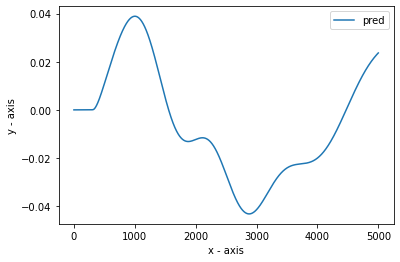

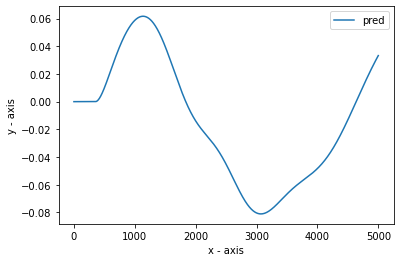

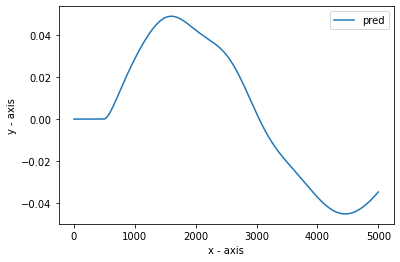

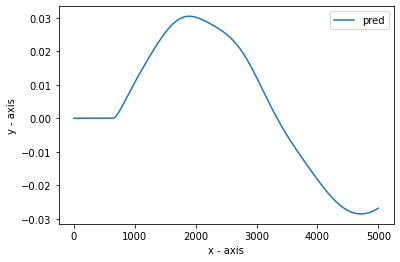

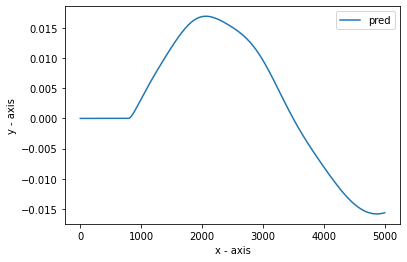

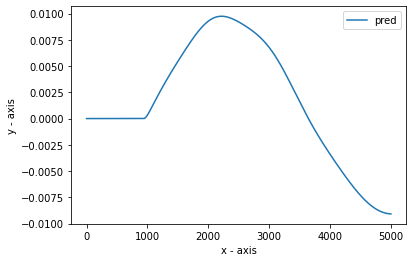

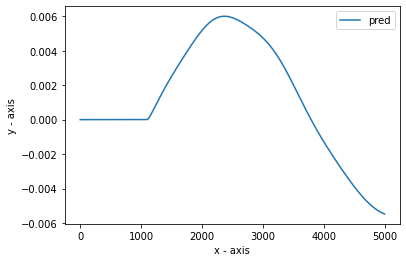

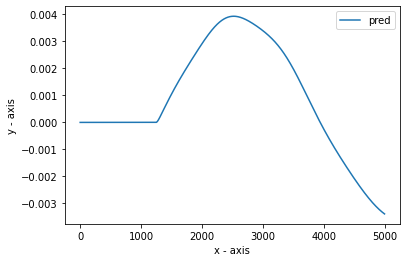

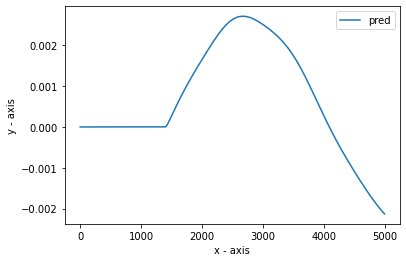

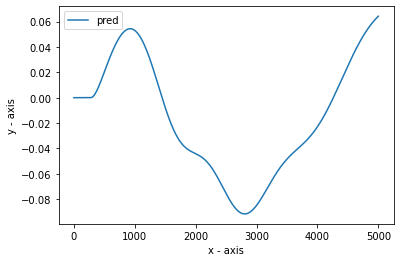

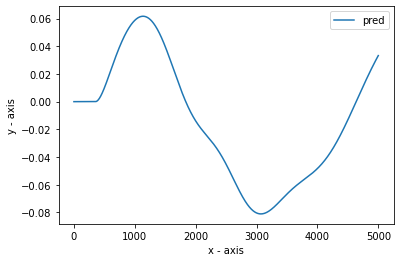

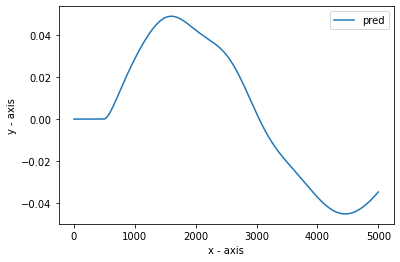

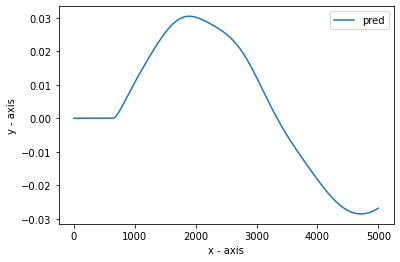

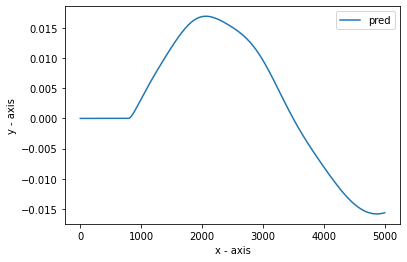

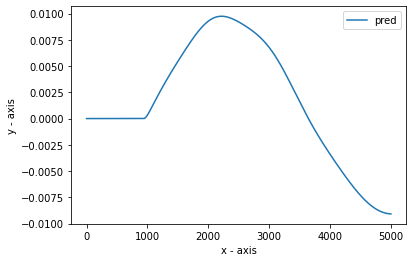

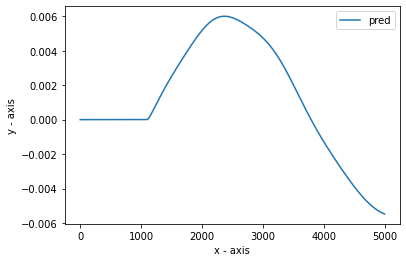

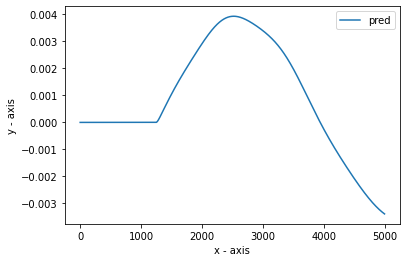

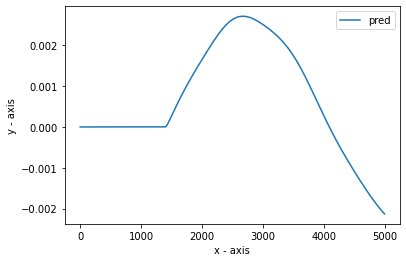

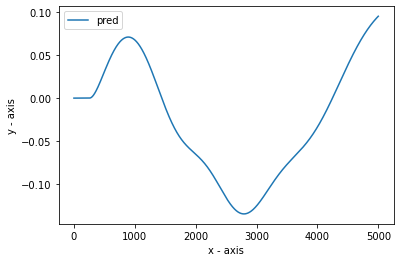

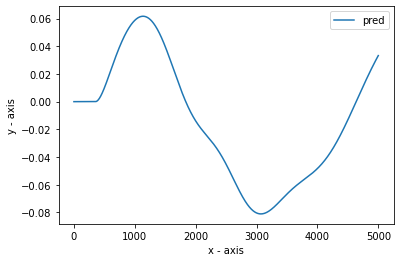

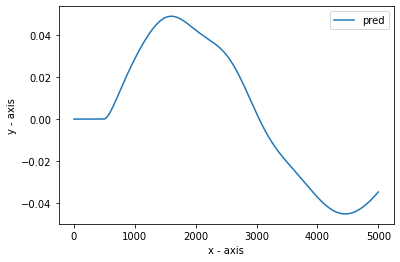

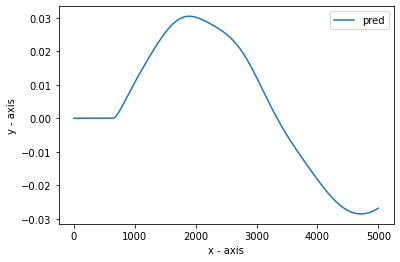

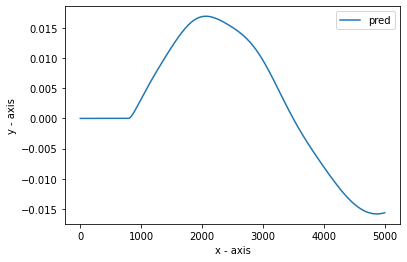

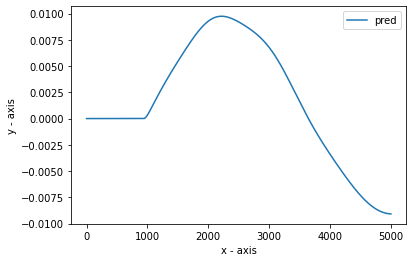

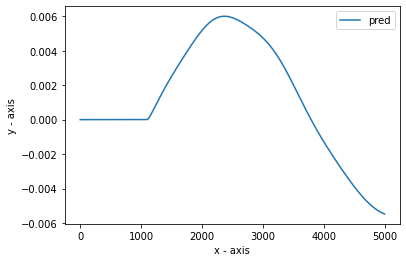

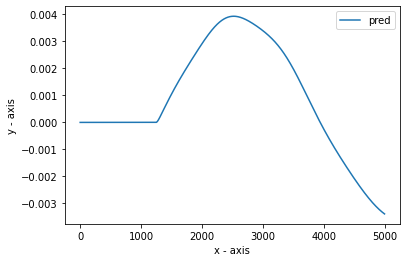

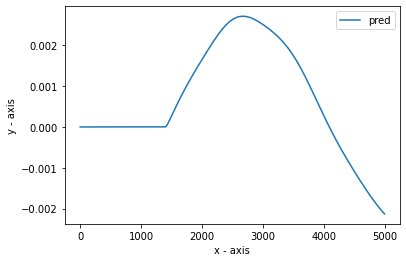

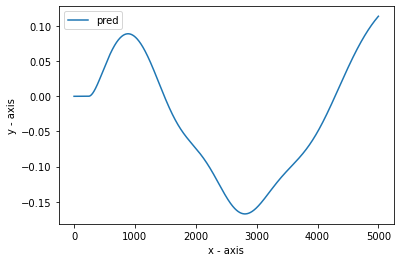

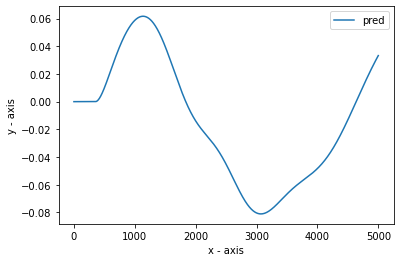

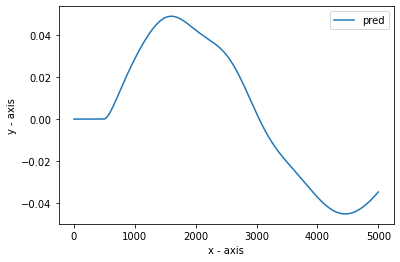

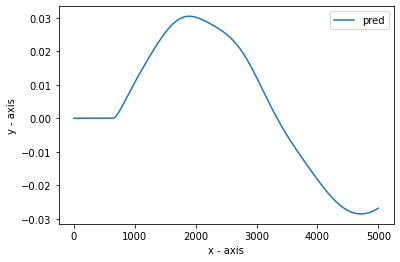

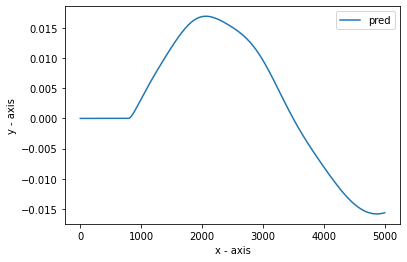

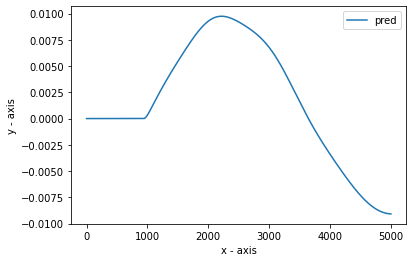

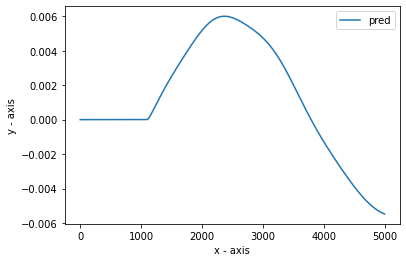

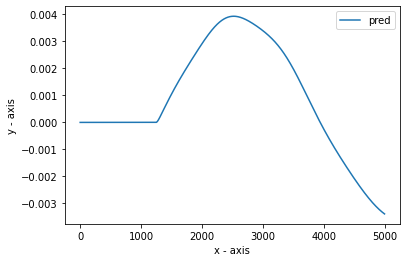

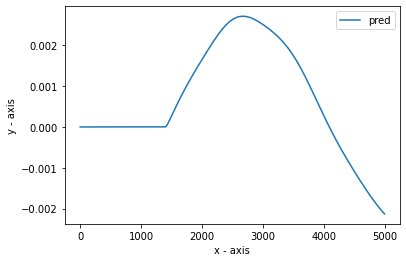

In [4]:
for i in range(len(X1)):
    plt.plot(X1[i], label = "pred")
# naming the x axis

    plt.xlabel('x - axis')

# naming the y axis

    plt.ylabel('y - axis')

# show a legend on the plot

    plt.legend()

# function to show the plot

    plt.show()

In [5]:
X = X.reshape(-1,1)
F = F.reshape(-1,1)
from sklearn.preprocessing import  MinMaxScaler
scaler_F = MinMaxScaler(feature_range=(-1, 1))
scaler_X = MinMaxScaler(feature_range=(-1, 1))
X = scaler_X.fit_transform(X)
F = scaler_F.fit_transform(F)

In [6]:
X = X.reshape(-1,5001,5)
F = F.reshape(-1,5001,5)

In [7]:
#创建数据集 
def Generate_data(X_data0, y_data0, window_size=50):
    X_new_temp = []
    y_new_temp = []
    for i in range(len(X_data0)):
        X_temp = X_data0[i]
        y_temp = y_data0[i]
        X_new = []
        y_new = []
        for j in range(int(np.floor(len(X_temp) / window_size))):
            X_new.append(X_temp[j * window_size:(j + 1) * window_size])
            y_new.append(y_temp[(j + 1) * window_size - 1, :])
            
        X_new_temp.append(np.array(X_new))
        y_new_temp.append(np.array(y_new))

    X_data_new0 = np.array(X_new_temp)
    y_data_new0 = np.array(y_new_temp)
    X_data_new0 = X_data_new0.reshape(len(X_data0),int(np.floor(len(X_temp) / window_size)),window_size*X_data0.shape[2])

    return X_data_new0, y_data_new0

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(F,X , test_size=0.3, random_state=42)

In [9]:
windowsize = 20
X_data_new, y_data_new = Generate_data(X_train, y_train, windowsize)

In [10]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN,LSTM,Activation,GRU,Flatten,Dropout
from tensorflow.keras.optimizers import  Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import os
from tensorflow.keras.optimizers import SGD
import keras
os.environ["CUDA_VISIBLE_DEVICES"] = '0'
earlyStop = EarlyStopping(monitor='val_loss', min_delta=0, patience=3000, verbose=2, mode='auto', restore_best_weights=True)


adam = Adam(learning_rate=0.001, decay=0.0001)
# 创建RNN模型
model = Sequential()
model.add(LSTM(units=64,return_sequences=True,stateful=False,input_shape=(X_data_new.shape[1], X_data_new.shape[2])))  # 第二层LSTM
model.add(LSTM(units=64,return_sequences=True,stateful=False))  # 第三层LSTM
model.add(LSTM(units=64,return_sequences=True,stateful=False))  # 第三层LSTM
model.add(LSTM(units=64,return_sequences=True,stateful=False))  # 第三层LSTM
model.add(LSTM(units=64,return_sequences=True,stateful=False))  # 第三层LSTM
model.add(Dense(units=512))
model.add(Dense(units=512))
model.add(Dense(units=512))
model.add(Dense(units=256))
model.add(Dense(units=5))

# 编译模型
model.compile(loss='mse', optimizer='adam', metrics = ['mae'])

# 进行预测
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 250, 64)           42240     
_________________________________________________________________
lstm_1 (LSTM)                (None, 250, 64)           33024     
_________________________________________________________________
lstm_2 (LSTM)                (None, 250, 64)           33024     
_________________________________________________________________
lstm_3 (LSTM)                (None, 250, 64)           33024     
_________________________________________________________________
lstm_4 (LSTM)                (None, 250, 64)           33024     
_________________________________________________________________
dense (Dense)                (None, 250, 512)          33280     
_________________________________________________________________
dense_1 (Dense)              (None, 250, 512)          2

In [11]:

history = model.fit(X_data_new, y_data_new,epochs=20000, validation_split=0.3,verbose=1,callbacks = earlyStop)

Epoch 1/20000
1/1 [==============================] - 7s 7s/step - loss: 0.0701 - mae: 0.2447 - val_loss: 0.0504 - val_mae: 0.1539
Epoch 2/20000
1/1 [==============================] - 0s 142ms/step - loss: 0.0230 - mae: 0.1055 - val_loss: 0.1119 - val_mae: 0.2991
Epoch 3/20000
1/1 [==============================] - 0s 139ms/step - loss: 0.1005 - mae: 0.2972 - val_loss: 0.0460 - val_mae: 0.1538
Epoch 4/20000
1/1 [==============================] - 0s 135ms/step - loss: 0.0227 - mae: 0.1133 - val_loss: 0.0600 - val_mae: 0.1758
Epoch 5/20000
1/1 [==============================] - 0s 127ms/step - loss: 0.0302 - mae: 0.1312 - val_loss: 0.0452 - val_mae: 0.1421
Epoch 6/20000
1/1 [==============================] - 0s 138ms/step - loss: 0.0208 - mae: 0.0953 - val_loss: 0.0470 - val_mae: 0.1630
Epoch 7/20000
1/1 [==============================] - 0s 139ms/step - loss: 0.0270 - mae: 0.1298 - val_loss: 0.0453 - val_mae: 0.1604
Epoch 8/20000
1/1 [==============================] - 0s 130ms/step - los

1/1 [==============================] - 0s 130ms/step - loss: 0.0166 - mae: 0.0731 - val_loss: 0.0408 - val_mae: 0.1219
Epoch 63/20000
1/1 [==============================] - 0s 139ms/step - loss: 0.0166 - mae: 0.0728 - val_loss: 0.0408 - val_mae: 0.1219
Epoch 64/20000
1/1 [==============================] - 0s 125ms/step - loss: 0.0166 - mae: 0.0727 - val_loss: 0.0407 - val_mae: 0.1220
Epoch 65/20000
1/1 [==============================] - 0s 131ms/step - loss: 0.0166 - mae: 0.0729 - val_loss: 0.0406 - val_mae: 0.1222
Epoch 66/20000
1/1 [==============================] - 0s 127ms/step - loss: 0.0166 - mae: 0.0732 - val_loss: 0.0405 - val_mae: 0.1224
Epoch 67/20000
1/1 [==============================] - 0s 129ms/step - loss: 0.0165 - mae: 0.0737 - val_loss: 0.0404 - val_mae: 0.1226
Epoch 68/20000
1/1 [==============================] - 0s 132ms/step - loss: 0.0165 - mae: 0.0740 - val_loss: 0.0404 - val_mae: 0.1226
Epoch 69/20000
1/1 [==============================] - 0s 126ms/step - loss: 0

1/1 [==============================] - 0s 136ms/step - loss: 0.0165 - mae: 0.0749 - val_loss: 0.0403 - val_mae: 0.1226
Epoch 124/20000
1/1 [==============================] - 0s 137ms/step - loss: 0.0165 - mae: 0.0744 - val_loss: 0.0403 - val_mae: 0.1228
Epoch 125/20000
1/1 [==============================] - 0s 145ms/step - loss: 0.0165 - mae: 0.0747 - val_loss: 0.0401 - val_mae: 0.1231
Epoch 126/20000
1/1 [==============================] - 0s 130ms/step - loss: 0.0165 - mae: 0.0753 - val_loss: 0.0401 - val_mae: 0.1228
Epoch 127/20000
1/1 [==============================] - 0s 133ms/step - loss: 0.0165 - mae: 0.0751 - val_loss: 0.0402 - val_mae: 0.1223
Epoch 128/20000
1/1 [==============================] - 0s 139ms/step - loss: 0.0165 - mae: 0.0742 - val_loss: 0.0401 - val_mae: 0.1223
Epoch 129/20000
1/1 [==============================] - 0s 131ms/step - loss: 0.0164 - mae: 0.0744 - val_loss: 0.0399 - val_mae: 0.1226
Epoch 130/20000
1/1 [==============================] - 0s 127ms/step - 

Epoch 184/20000
1/1 [==============================] - 0s 138ms/step - loss: 0.0167 - mae: 0.0744 - val_loss: 0.0407 - val_mae: 0.1227
Epoch 185/20000
1/1 [==============================] - 0s 135ms/step - loss: 0.0166 - mae: 0.0738 - val_loss: 0.0408 - val_mae: 0.1224
Epoch 186/20000
1/1 [==============================] - 0s 136ms/step - loss: 0.0166 - mae: 0.0733 - val_loss: 0.0408 - val_mae: 0.1222
Epoch 187/20000
1/1 [==============================] - 0s 136ms/step - loss: 0.0166 - mae: 0.0730 - val_loss: 0.0408 - val_mae: 0.1223
Epoch 188/20000
1/1 [==============================] - 0s 146ms/step - loss: 0.0166 - mae: 0.0730 - val_loss: 0.0408 - val_mae: 0.1223
Epoch 189/20000
1/1 [==============================] - 0s 137ms/step - loss: 0.0166 - mae: 0.0731 - val_loss: 0.0408 - val_mae: 0.1223
Epoch 190/20000
1/1 [==============================] - 0s 135ms/step - loss: 0.0166 - mae: 0.0732 - val_loss: 0.0407 - val_mae: 0.1223
Epoch 191/20000
1/1 [==============================] - 

Epoch 245/20000
1/1 [==============================] - 0s 129ms/step - loss: 0.0191 - mae: 0.0893 - val_loss: 0.0431 - val_mae: 0.1296
Epoch 246/20000
1/1 [==============================] - 0s 138ms/step - loss: 0.0181 - mae: 0.0806 - val_loss: 0.0410 - val_mae: 0.1283
Epoch 247/20000
1/1 [==============================] - 0s 134ms/step - loss: 0.0171 - mae: 0.0810 - val_loss: 0.0419 - val_mae: 0.1352
Epoch 248/20000
1/1 [==============================] - 0s 131ms/step - loss: 0.0187 - mae: 0.0912 - val_loss: 0.0417 - val_mae: 0.1342
Epoch 249/20000
1/1 [==============================] - 0s 132ms/step - loss: 0.0186 - mae: 0.0896 - val_loss: 0.0407 - val_mae: 0.1268
Epoch 250/20000
1/1 [==============================] - 0s 136ms/step - loss: 0.0170 - mae: 0.0791 - val_loss: 0.0418 - val_mae: 0.1252
Epoch 251/20000
1/1 [==============================] - 0s 138ms/step - loss: 0.0171 - mae: 0.0752 - val_loss: 0.0435 - val_mae: 0.1309
Epoch 252/20000
1/1 [==============================] - 

Epoch 306/20000
1/1 [==============================] - 0s 131ms/step - loss: 0.0170 - mae: 0.0735 - val_loss: 0.0434 - val_mae: 0.1276
Epoch 307/20000
1/1 [==============================] - 0s 134ms/step - loss: 0.0177 - mae: 0.0770 - val_loss: 0.0427 - val_mae: 0.1276
Epoch 308/20000
1/1 [==============================] - 0s 125ms/step - loss: 0.0175 - mae: 0.0779 - val_loss: 0.0413 - val_mae: 0.1258
Epoch 309/20000
1/1 [==============================] - 0s 130ms/step - loss: 0.0170 - mae: 0.0773 - val_loss: 0.0405 - val_mae: 0.1266
Epoch 310/20000
1/1 [==============================] - 0s 127ms/step - loss: 0.0170 - mae: 0.0792 - val_loss: 0.0406 - val_mae: 0.1305
Epoch 311/20000
1/1 [==============================] - 0s 133ms/step - loss: 0.0175 - mae: 0.0847 - val_loss: 0.0407 - val_mae: 0.1305
Epoch 312/20000
1/1 [==============================] - 0s 128ms/step - loss: 0.0174 - mae: 0.0845 - val_loss: 0.0405 - val_mae: 0.1257
Epoch 313/20000
1/1 [==============================] - 

Epoch 367/20000
1/1 [==============================] - 0s 141ms/step - loss: 0.0155 - mae: 0.0741 - val_loss: 0.0374 - val_mae: 0.1217
Epoch 368/20000
1/1 [==============================] - 0s 139ms/step - loss: 0.0156 - mae: 0.0767 - val_loss: 0.0385 - val_mae: 0.1189
Epoch 369/20000
1/1 [==============================] - 0s 129ms/step - loss: 0.0152 - mae: 0.0709 - val_loss: 0.0376 - val_mae: 0.1189
Epoch 370/20000
1/1 [==============================] - 0s 134ms/step - loss: 0.0150 - mae: 0.0719 - val_loss: 0.0361 - val_mae: 0.1217
Epoch 371/20000
1/1 [==============================] - 0s 139ms/step - loss: 0.0153 - mae: 0.0789 - val_loss: 0.0395 - val_mae: 0.1209
Epoch 372/20000
1/1 [==============================] - 0s 132ms/step - loss: 0.0158 - mae: 0.0733 - val_loss: 0.0377 - val_mae: 0.1345
Epoch 373/20000
1/1 [==============================] - 0s 141ms/step - loss: 0.0200 - mae: 0.1013 - val_loss: 0.0393 - val_mae: 0.1211
Epoch 374/20000
1/1 [==============================] - 

Epoch 428/20000
1/1 [==============================] - 0s 136ms/step - loss: 0.0166 - mae: 0.0738 - val_loss: 0.0407 - val_mae: 0.1223
Epoch 429/20000
1/1 [==============================] - 0s 130ms/step - loss: 0.0166 - mae: 0.0735 - val_loss: 0.0407 - val_mae: 0.1219
Epoch 430/20000
1/1 [==============================] - 0s 137ms/step - loss: 0.0166 - mae: 0.0729 - val_loss: 0.0407 - val_mae: 0.1219
Epoch 431/20000
1/1 [==============================] - 0s 138ms/step - loss: 0.0166 - mae: 0.0729 - val_loss: 0.0406 - val_mae: 0.1222
Epoch 432/20000
1/1 [==============================] - 0s 138ms/step - loss: 0.0166 - mae: 0.0735 - val_loss: 0.0405 - val_mae: 0.1226
Epoch 433/20000
1/1 [==============================] - 0s 137ms/step - loss: 0.0166 - mae: 0.0741 - val_loss: 0.0405 - val_mae: 0.1226
Epoch 434/20000
1/1 [==============================] - 0s 142ms/step - loss: 0.0166 - mae: 0.0741 - val_loss: 0.0406 - val_mae: 0.1222
Epoch 435/20000
1/1 [==============================] - 

Epoch 489/20000
1/1 [==============================] - 0s 133ms/step - loss: 0.0167 - mae: 0.0734 - val_loss: 0.0408 - val_mae: 0.1234
Epoch 490/20000
1/1 [==============================] - 0s 132ms/step - loss: 0.0167 - mae: 0.0741 - val_loss: 0.0407 - val_mae: 0.1237
Epoch 491/20000
1/1 [==============================] - 0s 136ms/step - loss: 0.0167 - mae: 0.0746 - val_loss: 0.0407 - val_mae: 0.1235
Epoch 492/20000
1/1 [==============================] - 0s 134ms/step - loss: 0.0167 - mae: 0.0745 - val_loss: 0.0408 - val_mae: 0.1229
Epoch 493/20000
1/1 [==============================] - 0s 134ms/step - loss: 0.0167 - mae: 0.0738 - val_loss: 0.0409 - val_mae: 0.1224
Epoch 494/20000
1/1 [==============================] - 0s 138ms/step - loss: 0.0167 - mae: 0.0731 - val_loss: 0.0410 - val_mae: 0.1223
Epoch 495/20000
1/1 [==============================] - 0s 140ms/step - loss: 0.0167 - mae: 0.0728 - val_loss: 0.0410 - val_mae: 0.1223
Epoch 496/20000
1/1 [==============================] - 

Epoch 550/20000
1/1 [==============================] - 0s 135ms/step - loss: 0.0151 - mae: 0.0762 - val_loss: 0.0382 - val_mae: 0.1217
Epoch 551/20000
1/1 [==============================] - 0s 134ms/step - loss: 0.0153 - mae: 0.0743 - val_loss: 0.0412 - val_mae: 0.1471
Epoch 552/20000
1/1 [==============================] - 0s 135ms/step - loss: 0.0236 - mae: 0.1170 - val_loss: 0.1628 - val_mae: 0.3328
Epoch 553/20000
1/1 [==============================] - 0s 134ms/step - loss: 0.1251 - mae: 0.3075 - val_loss: 0.0436 - val_mae: 0.1531
Epoch 554/20000
1/1 [==============================] - 0s 138ms/step - loss: 0.0239 - mae: 0.1188 - val_loss: 0.0421 - val_mae: 0.1436
Epoch 555/20000
1/1 [==============================] - 0s 137ms/step - loss: 0.0206 - mae: 0.1029 - val_loss: 0.0408 - val_mae: 0.1339
Epoch 556/20000
1/1 [==============================] - 0s 132ms/step - loss: 0.0181 - mae: 0.0889 - val_loss: 0.0409 - val_mae: 0.1358
Epoch 557/20000
1/1 [==============================] - 

Epoch 611/20000
1/1 [==============================] - 0s 137ms/step - loss: 0.0233 - mae: 0.1164 - val_loss: 0.0472 - val_mae: 0.1418
Epoch 612/20000
1/1 [==============================] - 0s 133ms/step - loss: 0.0217 - mae: 0.0951 - val_loss: 0.0451 - val_mae: 0.1366
Epoch 613/20000
1/1 [==============================] - 0s 130ms/step - loss: 0.0194 - mae: 0.0880 - val_loss: 0.0449 - val_mae: 0.1506
Epoch 614/20000
1/1 [==============================] - 0s 132ms/step - loss: 0.0231 - mae: 0.1120 - val_loss: 0.0410 - val_mae: 0.1291
Epoch 615/20000
1/1 [==============================] - 0s 128ms/step - loss: 0.0173 - mae: 0.0821 - val_loss: 0.0446 - val_mae: 0.1351
Epoch 616/20000
1/1 [==============================] - 0s 134ms/step - loss: 0.0188 - mae: 0.0859 - val_loss: 0.0421 - val_mae: 0.1306
Epoch 617/20000
1/1 [==============================] - 0s 133ms/step - loss: 0.0176 - mae: 0.0824 - val_loss: 0.0403 - val_mae: 0.1328
Epoch 618/20000
1/1 [==============================] - 

Epoch 672/20000
1/1 [==============================] - 0s 131ms/step - loss: 0.0147 - mae: 0.0757 - val_loss: 0.0381 - val_mae: 0.1202
Epoch 673/20000
1/1 [==============================] - 0s 132ms/step - loss: 0.0149 - mae: 0.0715 - val_loss: 0.0363 - val_mae: 0.1238
Epoch 674/20000
1/1 [==============================] - 0s 130ms/step - loss: 0.0154 - mae: 0.0805 - val_loss: 0.0407 - val_mae: 0.1240
Epoch 675/20000
1/1 [==============================] - 0s 134ms/step - loss: 0.0164 - mae: 0.0745 - val_loss: 0.0370 - val_mae: 0.1272
Epoch 676/20000
1/1 [==============================] - 0s 133ms/step - loss: 0.0167 - mae: 0.0861 - val_loss: 0.0382 - val_mae: 0.1193
Epoch 677/20000
1/1 [==============================] - 0s 131ms/step - loss: 0.0148 - mae: 0.0699 - val_loss: 0.0391 - val_mae: 0.1200
Epoch 678/20000
1/1 [==============================] - 0s 137ms/step - loss: 0.0152 - mae: 0.0700 - val_loss: 0.0370 - val_mae: 0.1213
Epoch 679/20000
1/1 [==============================] - 

Epoch 733/20000
1/1 [==============================] - 0s 132ms/step - loss: 0.0142 - mae: 0.0712 - val_loss: 0.0363 - val_mae: 0.1185
Epoch 734/20000
1/1 [==============================] - 0s 133ms/step - loss: 0.0142 - mae: 0.0708 - val_loss: 0.0361 - val_mae: 0.1187
Epoch 735/20000
1/1 [==============================] - 0s 135ms/step - loss: 0.0142 - mae: 0.0714 - val_loss: 0.0362 - val_mae: 0.1185
Epoch 736/20000
1/1 [==============================] - 0s 129ms/step - loss: 0.0142 - mae: 0.0708 - val_loss: 0.0362 - val_mae: 0.1185
Epoch 737/20000
1/1 [==============================] - 0s 132ms/step - loss: 0.0142 - mae: 0.0708 - val_loss: 0.0361 - val_mae: 0.1186
Epoch 738/20000
1/1 [==============================] - 0s 133ms/step - loss: 0.0142 - mae: 0.0711 - val_loss: 0.0363 - val_mae: 0.1183
Epoch 739/20000
1/1 [==============================] - 0s 140ms/step - loss: 0.0141 - mae: 0.0705 - val_loss: 0.0362 - val_mae: 0.1184
Epoch 740/20000
1/1 [==============================] - 

Epoch 794/20000
1/1 [==============================] - 0s 129ms/step - loss: 0.0168 - mae: 0.0749 - val_loss: 0.0404 - val_mae: 0.1207
Epoch 795/20000
1/1 [==============================] - 0s 132ms/step - loss: 0.0161 - mae: 0.0705 - val_loss: 0.0394 - val_mae: 0.1203
Epoch 796/20000
1/1 [==============================] - 0s 131ms/step - loss: 0.0159 - mae: 0.0709 - val_loss: 0.0390 - val_mae: 0.1236
Epoch 797/20000
1/1 [==============================] - 0s 130ms/step - loss: 0.0161 - mae: 0.0760 - val_loss: 0.0389 - val_mae: 0.1248
Epoch 798/20000
1/1 [==============================] - 0s 132ms/step - loss: 0.0163 - mae: 0.0780 - val_loss: 0.0387 - val_mae: 0.1233
Epoch 799/20000
1/1 [==============================] - 0s 129ms/step - loss: 0.0160 - mae: 0.0759 - val_loss: 0.0388 - val_mae: 0.1199
Epoch 800/20000
1/1 [==============================] - 0s 129ms/step - loss: 0.0155 - mae: 0.0706 - val_loss: 0.0390 - val_mae: 0.1183
Epoch 801/20000
1/1 [==============================] - 

Epoch 855/20000
1/1 [==============================] - 0s 129ms/step - loss: 0.0131 - mae: 0.0706 - val_loss: 0.0346 - val_mae: 0.1148
Epoch 856/20000
1/1 [==============================] - 0s 128ms/step - loss: 0.0133 - mae: 0.0680 - val_loss: 0.0340 - val_mae: 0.1139
Epoch 857/20000
1/1 [==============================] - 0s 131ms/step - loss: 0.0130 - mae: 0.0674 - val_loss: 0.0335 - val_mae: 0.1147
Epoch 858/20000
1/1 [==============================] - 0s 129ms/step - loss: 0.0131 - mae: 0.0699 - val_loss: 0.0335 - val_mae: 0.1150
Epoch 859/20000
1/1 [==============================] - 0s 126ms/step - loss: 0.0132 - mae: 0.0705 - val_loss: 0.0337 - val_mae: 0.1140
Epoch 860/20000
1/1 [==============================] - 0s 142ms/step - loss: 0.0129 - mae: 0.0684 - val_loss: 0.0341 - val_mae: 0.1130
Epoch 861/20000
1/1 [==============================] - 0s 134ms/step - loss: 0.0129 - mae: 0.0661 - val_loss: 0.0339 - val_mae: 0.1131
Epoch 862/20000
1/1 [==============================] - 

Epoch 916/20000
1/1 [==============================] - 0s 128ms/step - loss: 0.0142 - mae: 0.0733 - val_loss: 0.0355 - val_mae: 0.1189
Epoch 917/20000
1/1 [==============================] - 0s 146ms/step - loss: 0.0141 - mae: 0.0723 - val_loss: 0.0354 - val_mae: 0.1189
Epoch 918/20000
1/1 [==============================] - 0s 134ms/step - loss: 0.0141 - mae: 0.0725 - val_loss: 0.0357 - val_mae: 0.1183
Epoch 919/20000
1/1 [==============================] - 0s 127ms/step - loss: 0.0141 - mae: 0.0711 - val_loss: 0.0359 - val_mae: 0.1180
Epoch 920/20000
1/1 [==============================] - 0s 131ms/step - loss: 0.0141 - mae: 0.0702 - val_loss: 0.0356 - val_mae: 0.1182
Epoch 921/20000
1/1 [==============================] - 0s 134ms/step - loss: 0.0140 - mae: 0.0709 - val_loss: 0.0355 - val_mae: 0.1186
Epoch 922/20000
1/1 [==============================] - 0s 123ms/step - loss: 0.0140 - mae: 0.0716 - val_loss: 0.0356 - val_mae: 0.1185
Epoch 923/20000
1/1 [==============================] - 

Epoch 977/20000
1/1 [==============================] - 0s 135ms/step - loss: 0.0140 - mae: 0.0669 - val_loss: 0.0361 - val_mae: 0.1215
Epoch 978/20000
1/1 [==============================] - 0s 138ms/step - loss: 0.0151 - mae: 0.0767 - val_loss: 0.0369 - val_mae: 0.1247
Epoch 979/20000
1/1 [==============================] - 0s 131ms/step - loss: 0.0159 - mae: 0.0809 - val_loss: 0.0370 - val_mae: 0.1226
Epoch 980/20000
1/1 [==============================] - 0s 133ms/step - loss: 0.0156 - mae: 0.0774 - val_loss: 0.0371 - val_mae: 0.1198
Epoch 981/20000
1/1 [==============================] - 0s 127ms/step - loss: 0.0152 - mae: 0.0729 - val_loss: 0.0373 - val_mae: 0.1177
Epoch 982/20000
1/1 [==============================] - 0s 130ms/step - loss: 0.0149 - mae: 0.0695 - val_loss: 0.0371 - val_mae: 0.1175
Epoch 983/20000
1/1 [==============================] - 0s 136ms/step - loss: 0.0147 - mae: 0.0693 - val_loss: 0.0370 - val_mae: 0.1189
Epoch 984/20000
1/1 [==============================] - 

1/1 [==============================] - 0s 131ms/step - loss: 0.0145 - mae: 0.0777 - val_loss: 0.0354 - val_mae: 0.1216
Epoch 1038/20000
1/1 [==============================] - 0s 129ms/step - loss: 0.0144 - mae: 0.0767 - val_loss: 0.0350 - val_mae: 0.1209
Epoch 1039/20000
1/1 [==============================] - 0s 130ms/step - loss: 0.0143 - mae: 0.0768 - val_loss: 0.0351 - val_mae: 0.1194
Epoch 1040/20000
1/1 [==============================] - 0s 129ms/step - loss: 0.0141 - mae: 0.0740 - val_loss: 0.0349 - val_mae: 0.1183
Epoch 1041/20000
1/1 [==============================] - 0s 129ms/step - loss: 0.0140 - mae: 0.0732 - val_loss: 0.0348 - val_mae: 0.1176
Epoch 1042/20000
1/1 [==============================] - 0s 133ms/step - loss: 0.0140 - mae: 0.0724 - val_loss: 0.0351 - val_mae: 0.1171
Epoch 1043/20000
1/1 [==============================] - 0s 133ms/step - loss: 0.0139 - mae: 0.0710 - val_loss: 0.0348 - val_mae: 0.1169
Epoch 1044/20000
1/1 [==============================] - 0s 128ms/

1/1 [==============================] - 0s 130ms/step - loss: 0.0135 - mae: 0.0716 - val_loss: 0.0318 - val_mae: 0.1101
Epoch 1098/20000
1/1 [==============================] - 0s 130ms/step - loss: 0.0126 - mae: 0.0672 - val_loss: 0.0322 - val_mae: 0.1113
Epoch 1099/20000
1/1 [==============================] - 0s 133ms/step - loss: 0.0129 - mae: 0.0676 - val_loss: 0.0320 - val_mae: 0.1114
Epoch 1100/20000
1/1 [==============================] - 0s 129ms/step - loss: 0.0129 - mae: 0.0684 - val_loss: 0.0311 - val_mae: 0.1105
Epoch 1101/20000
1/1 [==============================] - 0s 133ms/step - loss: 0.0125 - mae: 0.0692 - val_loss: 0.0315 - val_mae: 0.1123
Epoch 1102/20000
1/1 [==============================] - 0s 127ms/step - loss: 0.0129 - mae: 0.0719 - val_loss: 0.0309 - val_mae: 0.1088
Epoch 1103/20000
1/1 [==============================] - 0s 132ms/step - loss: 0.0121 - mae: 0.0660 - val_loss: 0.0314 - val_mae: 0.1091
Epoch 1104/20000
1/1 [==============================] - 0s 126ms/

1/1 [==============================] - 0s 135ms/step - loss: 0.0112 - mae: 0.0619 - val_loss: 0.0291 - val_mae: 0.1034
Epoch 1158/20000
1/1 [==============================] - 0s 127ms/step - loss: 0.0112 - mae: 0.0607 - val_loss: 0.0289 - val_mae: 0.1039
Epoch 1159/20000
1/1 [==============================] - 0s 128ms/step - loss: 0.0113 - mae: 0.0619 - val_loss: 0.0281 - val_mae: 0.1021
Epoch 1160/20000
1/1 [==============================] - 0s 126ms/step - loss: 0.0108 - mae: 0.0603 - val_loss: 0.0274 - val_mae: 0.1019
Epoch 1161/20000
1/1 [==============================] - 0s 132ms/step - loss: 0.0105 - mae: 0.0612 - val_loss: 0.0270 - val_mae: 0.1018
Epoch 1162/20000
1/1 [==============================] - 0s 127ms/step - loss: 0.0106 - mae: 0.0627 - val_loss: 0.0262 - val_mae: 0.0995
Epoch 1163/20000
1/1 [==============================] - 0s 126ms/step - loss: 0.0103 - mae: 0.0612 - val_loss: 0.0256 - val_mae: 0.0991
Epoch 1164/20000
1/1 [==============================] - 0s 135ms/

1/1 [==============================] - 0s 137ms/step - loss: 0.0103 - mae: 0.0609 - val_loss: 0.0266 - val_mae: 0.1014
Epoch 1218/20000
1/1 [==============================] - 0s 131ms/step - loss: 0.0102 - mae: 0.0607 - val_loss: 0.0263 - val_mae: 0.1010
Epoch 1219/20000
1/1 [==============================] - 0s 129ms/step - loss: 0.0102 - mae: 0.0609 - val_loss: 0.0260 - val_mae: 0.1004
Epoch 1220/20000
1/1 [==============================] - 0s 131ms/step - loss: 0.0101 - mae: 0.0606 - val_loss: 0.0258 - val_mae: 0.1000
Epoch 1221/20000
1/1 [==============================] - 0s 131ms/step - loss: 0.0100 - mae: 0.0604 - val_loss: 0.0256 - val_mae: 0.0997
Epoch 1222/20000
1/1 [==============================] - 0s 130ms/step - loss: 0.0099 - mae: 0.0604 - val_loss: 0.0255 - val_mae: 0.0992
Epoch 1223/20000
1/1 [==============================] - 0s 127ms/step - loss: 0.0099 - mae: 0.0599 - val_loss: 0.0254 - val_mae: 0.0984
Epoch 1224/20000
1/1 [==============================] - 0s 133ms/

1/1 [==============================] - 0s 130ms/step - loss: 0.0071 - mae: 0.0436 - val_loss: 0.0205 - val_mae: 0.0773
Epoch 1278/20000
1/1 [==============================] - 0s 130ms/step - loss: 0.0081 - mae: 0.0478 - val_loss: 0.0253 - val_mae: 0.1051
Epoch 1279/20000
1/1 [==============================] - 0s 129ms/step - loss: 0.0120 - mae: 0.0764 - val_loss: 0.0272 - val_mae: 0.1052
Epoch 1280/20000
1/1 [==============================] - 0s 131ms/step - loss: 0.0122 - mae: 0.0716 - val_loss: 0.0290 - val_mae: 0.1026
Epoch 1281/20000
1/1 [==============================] - 0s 132ms/step - loss: 0.0124 - mae: 0.0649 - val_loss: 0.0304 - val_mae: 0.1064
Epoch 1282/20000
1/1 [==============================] - 0s 128ms/step - loss: 0.0131 - mae: 0.0676 - val_loss: 0.0297 - val_mae: 0.1067
Epoch 1283/20000
1/1 [==============================] - 0s 128ms/step - loss: 0.0130 - mae: 0.0686 - val_loss: 0.0279 - val_mae: 0.1030
Epoch 1284/20000
1/1 [==============================] - 0s 130ms/

1/1 [==============================] - 0s 138ms/step - loss: 0.0077 - mae: 0.0486 - val_loss: 0.0202 - val_mae: 0.0780
Epoch 1338/20000
1/1 [==============================] - 0s 128ms/step - loss: 0.0075 - mae: 0.0470 - val_loss: 0.0201 - val_mae: 0.0777
Epoch 1339/20000
1/1 [==============================] - 0s 137ms/step - loss: 0.0074 - mae: 0.0467 - val_loss: 0.0201 - val_mae: 0.0785
Epoch 1340/20000
1/1 [==============================] - 0s 156ms/step - loss: 0.0075 - mae: 0.0478 - val_loss: 0.0203 - val_mae: 0.0787
Epoch 1341/20000
1/1 [==============================] - 0s 140ms/step - loss: 0.0076 - mae: 0.0482 - val_loss: 0.0203 - val_mae: 0.0792
Epoch 1342/20000
1/1 [==============================] - 0s 128ms/step - loss: 0.0075 - mae: 0.0486 - val_loss: 0.0203 - val_mae: 0.0775
Epoch 1343/20000
1/1 [==============================] - 0s 130ms/step - loss: 0.0074 - mae: 0.0455 - val_loss: 0.0203 - val_mae: 0.0777
Epoch 1344/20000
1/1 [==============================] - 0s 126ms/

1/1 [==============================] - 0s 129ms/step - loss: 0.0074 - mae: 0.0485 - val_loss: 0.0197 - val_mae: 0.0753
Epoch 1398/20000
1/1 [==============================] - 0s 131ms/step - loss: 0.0072 - mae: 0.0456 - val_loss: 0.0197 - val_mae: 0.0741
Epoch 1399/20000
1/1 [==============================] - 0s 142ms/step - loss: 0.0070 - mae: 0.0431 - val_loss: 0.0198 - val_mae: 0.0764
Epoch 1400/20000
1/1 [==============================] - 0s 129ms/step - loss: 0.0073 - mae: 0.0465 - val_loss: 0.0194 - val_mae: 0.0725
Epoch 1401/20000
1/1 [==============================] - 0s 129ms/step - loss: 0.0070 - mae: 0.0424 - val_loss: 0.0196 - val_mae: 0.0749
Epoch 1402/20000
1/1 [==============================] - 0s 128ms/step - loss: 0.0073 - mae: 0.0459 - val_loss: 0.0193 - val_mae: 0.0719
Epoch 1403/20000
1/1 [==============================] - 0s 133ms/step - loss: 0.0068 - mae: 0.0411 - val_loss: 0.0197 - val_mae: 0.0780
Epoch 1404/20000
1/1 [==============================] - 0s 132ms/

1/1 [==============================] - 0s 135ms/step - loss: 0.0069 - mae: 0.0428 - val_loss: 0.0194 - val_mae: 0.0729
Epoch 1458/20000
1/1 [==============================] - 0s 133ms/step - loss: 0.0069 - mae: 0.0424 - val_loss: 0.0193 - val_mae: 0.0728
Epoch 1459/20000
1/1 [==============================] - 0s 127ms/step - loss: 0.0069 - mae: 0.0425 - val_loss: 0.0193 - val_mae: 0.0722
Epoch 1460/20000
1/1 [==============================] - 0s 129ms/step - loss: 0.0068 - mae: 0.0419 - val_loss: 0.0192 - val_mae: 0.0720
Epoch 1461/20000
1/1 [==============================] - 0s 134ms/step - loss: 0.0068 - mae: 0.0419 - val_loss: 0.0192 - val_mae: 0.0717
Epoch 1462/20000
1/1 [==============================] - 0s 133ms/step - loss: 0.0068 - mae: 0.0415 - val_loss: 0.0192 - val_mae: 0.0717
Epoch 1463/20000
1/1 [==============================] - 0s 132ms/step - loss: 0.0068 - mae: 0.0417 - val_loss: 0.0192 - val_mae: 0.0719
Epoch 1464/20000
1/1 [==============================] - 0s 131ms/

1/1 [==============================] - 0s 135ms/step - loss: 0.0071 - mae: 0.0465 - val_loss: 0.0195 - val_mae: 0.0788
Epoch 1518/20000
1/1 [==============================] - 0s 136ms/step - loss: 0.0076 - mae: 0.0507 - val_loss: 0.0191 - val_mae: 0.0743
Epoch 1519/20000
1/1 [==============================] - 0s 126ms/step - loss: 0.0072 - mae: 0.0458 - val_loss: 0.0187 - val_mae: 0.0721
Epoch 1520/20000
1/1 [==============================] - 0s 126ms/step - loss: 0.0070 - mae: 0.0434 - val_loss: 0.0188 - val_mae: 0.0762
Epoch 1521/20000
1/1 [==============================] - 0s 126ms/step - loss: 0.0072 - mae: 0.0479 - val_loss: 0.0183 - val_mae: 0.0703
Epoch 1522/20000
1/1 [==============================] - 0s 129ms/step - loss: 0.0066 - mae: 0.0411 - val_loss: 0.0186 - val_mae: 0.0708
Epoch 1523/20000
1/1 [==============================] - 0s 132ms/step - loss: 0.0067 - mae: 0.0410 - val_loss: 0.0188 - val_mae: 0.0726
Epoch 1524/20000
1/1 [==============================] - 0s 131ms/

1/1 [==============================] - 0s 133ms/step - loss: 0.0112 - mae: 0.0704 - val_loss: 0.0266 - val_mae: 0.1051
Epoch 1578/20000
1/1 [==============================] - 0s 133ms/step - loss: 0.0112 - mae: 0.0745 - val_loss: 0.0282 - val_mae: 0.1017
Epoch 1579/20000
1/1 [==============================] - 0s 137ms/step - loss: 0.0114 - mae: 0.0666 - val_loss: 0.0270 - val_mae: 0.1081
Epoch 1580/20000
1/1 [==============================] - 0s 133ms/step - loss: 0.0119 - mae: 0.0769 - val_loss: 0.0269 - val_mae: 0.1017
Epoch 1581/20000
1/1 [==============================] - 0s 132ms/step - loss: 0.0107 - mae: 0.0659 - val_loss: 0.0283 - val_mae: 0.1112
Epoch 1582/20000
1/1 [==============================] - 0s 132ms/step - loss: 0.0123 - mae: 0.0810 - val_loss: 0.0262 - val_mae: 0.0934
Epoch 1583/20000
1/1 [==============================] - 0s 132ms/step - loss: 0.0096 - mae: 0.0540 - val_loss: 0.0268 - val_mae: 0.1014
Epoch 1584/20000
1/1 [==============================] - 0s 130ms/

1/1 [==============================] - 0s 129ms/step - loss: 0.0069 - mae: 0.0418 - val_loss: 0.0192 - val_mae: 0.0703
Epoch 1638/20000
1/1 [==============================] - 0s 129ms/step - loss: 0.0067 - mae: 0.0394 - val_loss: 0.0194 - val_mae: 0.0716
Epoch 1639/20000
1/1 [==============================] - 0s 132ms/step - loss: 0.0067 - mae: 0.0417 - val_loss: 0.0195 - val_mae: 0.0711
Epoch 1640/20000
1/1 [==============================] - 0s 130ms/step - loss: 0.0067 - mae: 0.0399 - val_loss: 0.0196 - val_mae: 0.0717
Epoch 1641/20000
1/1 [==============================] - 0s 132ms/step - loss: 0.0067 - mae: 0.0396 - val_loss: 0.0197 - val_mae: 0.0726
Epoch 1642/20000
1/1 [==============================] - 0s 128ms/step - loss: 0.0069 - mae: 0.0417 - val_loss: 0.0199 - val_mae: 0.0752
Epoch 1643/20000
1/1 [==============================] - 0s 131ms/step - loss: 0.0071 - mae: 0.0452 - val_loss: 0.0196 - val_mae: 0.0711
Epoch 1644/20000
1/1 [==============================] - 0s 138ms/

1/1 [==============================] - 0s 128ms/step - loss: 0.0061 - mae: 0.0397 - val_loss: 0.0176 - val_mae: 0.0708
Epoch 1698/20000
1/1 [==============================] - 0s 132ms/step - loss: 0.0062 - mae: 0.0403 - val_loss: 0.0171 - val_mae: 0.0708
Epoch 1699/20000
1/1 [==============================] - 0s 135ms/step - loss: 0.0061 - mae: 0.0411 - val_loss: 0.0162 - val_mae: 0.0689
Epoch 1700/20000
1/1 [==============================] - 0s 129ms/step - loss: 0.0058 - mae: 0.0402 - val_loss: 0.0156 - val_mae: 0.0678
Epoch 1701/20000
1/1 [==============================] - 0s 132ms/step - loss: 0.0057 - mae: 0.0400 - val_loss: 0.0153 - val_mae: 0.0666
Epoch 1702/20000
1/1 [==============================] - 0s 130ms/step - loss: 0.0055 - mae: 0.0391 - val_loss: 0.0152 - val_mae: 0.0654
Epoch 1703/20000
1/1 [==============================] - 0s 133ms/step - loss: 0.0054 - mae: 0.0383 - val_loss: 0.0153 - val_mae: 0.0663
Epoch 1704/20000
1/1 [==============================] - 0s 131ms/

1/1 [==============================] - 0s 131ms/step - loss: 0.0019 - mae: 0.0284 - val_loss: 0.0037 - val_mae: 0.0372
Epoch 1758/20000
1/1 [==============================] - 0s 128ms/step - loss: 0.0015 - mae: 0.0258 - val_loss: 0.0040 - val_mae: 0.0370
Epoch 1759/20000
1/1 [==============================] - 0s 130ms/step - loss: 0.0016 - mae: 0.0253 - val_loss: 0.0039 - val_mae: 0.0375
Epoch 1760/20000
1/1 [==============================] - 0s 126ms/step - loss: 0.0016 - mae: 0.0262 - val_loss: 0.0036 - val_mae: 0.0378
Epoch 1761/20000
1/1 [==============================] - 0s 126ms/step - loss: 0.0016 - mae: 0.0267 - val_loss: 0.0033 - val_mae: 0.0355
Epoch 1762/20000
1/1 [==============================] - 0s 128ms/step - loss: 0.0014 - mae: 0.0251 - val_loss: 0.0037 - val_mae: 0.0383
Epoch 1763/20000
1/1 [==============================] - 0s 127ms/step - loss: 0.0015 - mae: 0.0253 - val_loss: 0.0039 - val_mae: 0.0394
Epoch 1764/20000
1/1 [==============================] - 0s 130ms/

Epoch 1817/20000
1/1 [==============================] - 0s 133ms/step - loss: 7.1413e-04 - mae: 0.0185 - val_loss: 0.0021 - val_mae: 0.0281
Epoch 1818/20000
1/1 [==============================] - 0s 139ms/step - loss: 7.2230e-04 - mae: 0.0187 - val_loss: 0.0019 - val_mae: 0.0269
Epoch 1819/20000
1/1 [==============================] - 0s 133ms/step - loss: 7.0026e-04 - mae: 0.0185 - val_loss: 0.0019 - val_mae: 0.0266
Epoch 1820/20000
1/1 [==============================] - 0s 137ms/step - loss: 7.1011e-04 - mae: 0.0184 - val_loss: 0.0019 - val_mae: 0.0263
Epoch 1821/20000
1/1 [==============================] - 0s 138ms/step - loss: 6.6206e-04 - mae: 0.0175 - val_loss: 0.0019 - val_mae: 0.0266
Epoch 1822/20000
1/1 [==============================] - 0s 131ms/step - loss: 6.8381e-04 - mae: 0.0177 - val_loss: 0.0018 - val_mae: 0.0265
Epoch 1823/20000
1/1 [==============================] - 0s 128ms/step - loss: 6.6761e-04 - mae: 0.0174 - val_loss: 0.0018 - val_mae: 0.0267
Epoch 1824/20000
1/1

1/1 [==============================] - 0s 131ms/step - loss: 5.1248e-04 - mae: 0.0150 - val_loss: 0.0015 - val_mae: 0.0240
Epoch 1876/20000
1/1 [==============================] - 0s 130ms/step - loss: 5.2607e-04 - mae: 0.0152 - val_loss: 0.0016 - val_mae: 0.0235
Epoch 1877/20000
1/1 [==============================] - 0s 128ms/step - loss: 5.5584e-04 - mae: 0.0157 - val_loss: 0.0016 - val_mae: 0.0256
Epoch 1878/20000
1/1 [==============================] - 0s 138ms/step - loss: 6.2170e-04 - mae: 0.0170 - val_loss: 0.0017 - val_mae: 0.0247
Epoch 1879/20000
1/1 [==============================] - 0s 131ms/step - loss: 6.6155e-04 - mae: 0.0172 - val_loss: 0.0018 - val_mae: 0.0276
Epoch 1880/20000
1/1 [==============================] - 0s 133ms/step - loss: 7.7047e-04 - mae: 0.0192 - val_loss: 0.0018 - val_mae: 0.0256
Epoch 1881/20000
1/1 [==============================] - 0s 130ms/step - loss: 7.0465e-04 - mae: 0.0177 - val_loss: 0.0017 - val_mae: 0.0259
Epoch 1882/20000
1/1 [===============

1/1 [==============================] - 0s 127ms/step - loss: 4.5129e-04 - mae: 0.0139 - val_loss: 0.0014 - val_mae: 0.0220
Epoch 1934/20000
1/1 [==============================] - 0s 132ms/step - loss: 4.3637e-04 - mae: 0.0136 - val_loss: 0.0014 - val_mae: 0.0219
Epoch 1935/20000
1/1 [==============================] - 0s 135ms/step - loss: 4.3321e-04 - mae: 0.0135 - val_loss: 0.0014 - val_mae: 0.0215
Epoch 1936/20000
1/1 [==============================] - 0s 136ms/step - loss: 4.3911e-04 - mae: 0.0136 - val_loss: 0.0014 - val_mae: 0.0226
Epoch 1937/20000
1/1 [==============================] - 0s 130ms/step - loss: 4.5327e-04 - mae: 0.0139 - val_loss: 0.0014 - val_mae: 0.0217
Epoch 1938/20000
1/1 [==============================] - 0s 130ms/step - loss: 4.6969e-04 - mae: 0.0142 - val_loss: 0.0014 - val_mae: 0.0236
Epoch 1939/20000
1/1 [==============================] - 0s 127ms/step - loss: 5.0252e-04 - mae: 0.0150 - val_loss: 0.0014 - val_mae: 0.0224
Epoch 1940/20000
1/1 [===============

1/1 [==============================] - 0s 127ms/step - loss: 3.7653e-04 - mae: 0.0125 - val_loss: 0.0012 - val_mae: 0.0202
Epoch 1992/20000
1/1 [==============================] - 0s 126ms/step - loss: 3.8632e-04 - mae: 0.0128 - val_loss: 0.0013 - val_mae: 0.0215
Epoch 1993/20000
1/1 [==============================] - 0s 128ms/step - loss: 4.0613e-04 - mae: 0.0133 - val_loss: 0.0013 - val_mae: 0.0206
Epoch 1994/20000
1/1 [==============================] - 0s 135ms/step - loss: 4.1573e-04 - mae: 0.0134 - val_loss: 0.0013 - val_mae: 0.0223
Epoch 1995/20000
1/1 [==============================] - 0s 131ms/step - loss: 4.4820e-04 - mae: 0.0143 - val_loss: 0.0013 - val_mae: 0.0211
Epoch 1996/20000
1/1 [==============================] - 0s 129ms/step - loss: 4.3911e-04 - mae: 0.0139 - val_loss: 0.0013 - val_mae: 0.0226
Epoch 1997/20000
1/1 [==============================] - 0s 135ms/step - loss: 4.5812e-04 - mae: 0.0144 - val_loss: 0.0013 - val_mae: 0.0211
Epoch 1998/20000
1/1 [===============

1/1 [==============================] - 0s 131ms/step - loss: 4.3178e-04 - mae: 0.0140 - val_loss: 0.0012 - val_mae: 0.0200
Epoch 2050/20000
1/1 [==============================] - 0s 136ms/step - loss: 3.8732e-04 - mae: 0.0132 - val_loss: 0.0012 - val_mae: 0.0207
Epoch 2051/20000
1/1 [==============================] - 0s 129ms/step - loss: 3.8382e-04 - mae: 0.0129 - val_loss: 0.0012 - val_mae: 0.0198
Epoch 2052/20000
1/1 [==============================] - 0s 132ms/step - loss: 3.5992e-04 - mae: 0.0123 - val_loss: 0.0012 - val_mae: 0.0196
Epoch 2053/20000
1/1 [==============================] - 0s 129ms/step - loss: 3.5140e-04 - mae: 0.0122 - val_loss: 0.0012 - val_mae: 0.0204
Epoch 2054/20000
1/1 [==============================] - 0s 134ms/step - loss: 3.6765e-04 - mae: 0.0125 - val_loss: 0.0012 - val_mae: 0.0199
Epoch 2055/20000
1/1 [==============================] - 0s 133ms/step - loss: 3.9034e-04 - mae: 0.0131 - val_loss: 0.0013 - val_mae: 0.0218
Epoch 2056/20000
1/1 [===============

1/1 [==============================] - 0s 133ms/step - loss: 3.6910e-04 - mae: 0.0129 - val_loss: 0.0012 - val_mae: 0.0213
Epoch 2108/20000
1/1 [==============================] - 0s 132ms/step - loss: 4.3651e-04 - mae: 0.0144 - val_loss: 0.0011 - val_mae: 0.0197
Epoch 2109/20000
1/1 [==============================] - 0s 130ms/step - loss: 3.8849e-04 - mae: 0.0134 - val_loss: 0.0011 - val_mae: 0.0202
Epoch 2110/20000
1/1 [==============================] - 0s 130ms/step - loss: 3.8837e-04 - mae: 0.0134 - val_loss: 0.0011 - val_mae: 0.0188
Epoch 2111/20000
1/1 [==============================] - 0s 135ms/step - loss: 3.3260e-04 - mae: 0.0122 - val_loss: 0.0011 - val_mae: 0.0187
Epoch 2112/20000
1/1 [==============================] - 0s 128ms/step - loss: 3.1224e-04 - mae: 0.0114 - val_loss: 0.0011 - val_mae: 0.0186
Epoch 2113/20000
1/1 [==============================] - 0s 130ms/step - loss: 3.0769e-04 - mae: 0.0112 - val_loss: 0.0011 - val_mae: 0.0185
Epoch 2114/20000
1/1 [===============

1/1 [==============================] - 0s 135ms/step - loss: 3.0368e-04 - mae: 0.0115 - val_loss: 0.0011 - val_mae: 0.0196
Epoch 2166/20000
1/1 [==============================] - 0s 132ms/step - loss: 3.4523e-04 - mae: 0.0124 - val_loss: 0.0012 - val_mae: 0.0215
Epoch 2167/20000
1/1 [==============================] - 0s 134ms/step - loss: 3.9996e-04 - mae: 0.0136 - val_loss: 0.0011 - val_mae: 0.0181
Epoch 2168/20000
1/1 [==============================] - 0s 132ms/step - loss: 3.0212e-04 - mae: 0.0112 - val_loss: 0.0011 - val_mae: 0.0190
Epoch 2169/20000
1/1 [==============================] - 0s 134ms/step - loss: 3.1530e-04 - mae: 0.0116 - val_loss: 0.0012 - val_mae: 0.0207
Epoch 2170/20000
1/1 [==============================] - 0s 125ms/step - loss: 3.6251e-04 - mae: 0.0129 - val_loss: 0.0011 - val_mae: 0.0181
Epoch 2171/20000
1/1 [==============================] - 0s 128ms/step - loss: 2.9951e-04 - mae: 0.0113 - val_loss: 0.0010 - val_mae: 0.0183
Epoch 2172/20000
1/1 [===============

1/1 [==============================] - 0s 128ms/step - loss: 2.3425e-04 - mae: 0.0098 - val_loss: 9.4283e-04 - val_mae: 0.0166
Epoch 2224/20000
1/1 [==============================] - 0s 140ms/step - loss: 2.3043e-04 - mae: 0.0098 - val_loss: 9.4444e-04 - val_mae: 0.0165
Epoch 2225/20000
1/1 [==============================] - 0s 138ms/step - loss: 2.2942e-04 - mae: 0.0098 - val_loss: 9.4671e-04 - val_mae: 0.0167
Epoch 2226/20000
1/1 [==============================] - 0s 132ms/step - loss: 2.3014e-04 - mae: 0.0097 - val_loss: 9.3520e-04 - val_mae: 0.0166
Epoch 2227/20000
1/1 [==============================] - 0s 136ms/step - loss: 2.3394e-04 - mae: 0.0100 - val_loss: 9.6275e-04 - val_mae: 0.0172
Epoch 2228/20000
1/1 [==============================] - 0s 129ms/step - loss: 2.4198e-04 - mae: 0.0100 - val_loss: 9.5604e-04 - val_mae: 0.0170
Epoch 2229/20000
1/1 [==============================] - 0s 135ms/step - loss: 2.5762e-04 - mae: 0.0106 - val_loss: 0.0010 - val_mae: 0.0187
Epoch 2230/20

Epoch 2281/20000
1/1 [==============================] - 0s 132ms/step - loss: 2.4880e-04 - mae: 0.0103 - val_loss: 8.9715e-04 - val_mae: 0.0162
Epoch 2282/20000
1/1 [==============================] - 0s 138ms/step - loss: 2.1948e-04 - mae: 0.0097 - val_loss: 0.0010 - val_mae: 0.0177
Epoch 2283/20000
1/1 [==============================] - 0s 130ms/step - loss: 2.5544e-04 - mae: 0.0103 - val_loss: 0.0011 - val_mae: 0.0185
Epoch 2284/20000
1/1 [==============================] - 0s 131ms/step - loss: 2.8106e-04 - mae: 0.0107 - val_loss: 9.9659e-04 - val_mae: 0.0174
Epoch 2285/20000
1/1 [==============================] - 0s 130ms/step - loss: 2.4579e-04 - mae: 0.0104 - val_loss: 9.4843e-04 - val_mae: 0.0172
Epoch 2286/20000
1/1 [==============================] - 0s 133ms/step - loss: 2.3392e-04 - mae: 0.0101 - val_loss: 9.5089e-04 - val_mae: 0.0170
Epoch 2287/20000
1/1 [==============================] - 0s 125ms/step - loss: 2.5833e-04 - mae: 0.0110 - val_loss: 0.0011 - val_mae: 0.0196
Epoc

1/1 [==============================] - 0s 152ms/step - loss: 2.0040e-04 - mae: 0.0098 - val_loss: 9.1135e-04 - val_mae: 0.0171
Epoch 2339/20000
1/1 [==============================] - 0s 128ms/step - loss: 2.1052e-04 - mae: 0.0099 - val_loss: 8.7824e-04 - val_mae: 0.0162
Epoch 2340/20000
1/1 [==============================] - 0s 129ms/step - loss: 2.0631e-04 - mae: 0.0099 - val_loss: 9.2529e-04 - val_mae: 0.0174
Epoch 2341/20000
1/1 [==============================] - 0s 132ms/step - loss: 2.2294e-04 - mae: 0.0104 - val_loss: 8.9107e-04 - val_mae: 0.0166
Epoch 2342/20000
1/1 [==============================] - 0s 143ms/step - loss: 2.2193e-04 - mae: 0.0104 - val_loss: 9.7755e-04 - val_mae: 0.0184
Epoch 2343/20000
1/1 [==============================] - 0s 139ms/step - loss: 2.6490e-04 - mae: 0.0115 - val_loss: 9.2152e-04 - val_mae: 0.0174
Epoch 2344/20000
1/1 [==============================] - 0s 139ms/step - loss: 2.5973e-04 - mae: 0.0114 - val_loss: 0.0011 - val_mae: 0.0197
Epoch 2345/20

1/1 [==============================] - 0s 134ms/step - loss: 1.9078e-04 - mae: 0.0095 - val_loss: 8.2353e-04 - val_mae: 0.0150
Epoch 2396/20000
1/1 [==============================] - 0s 131ms/step - loss: 1.5401e-04 - mae: 0.0084 - val_loss: 9.1952e-04 - val_mae: 0.0160
Epoch 2397/20000
1/1 [==============================] - 0s 131ms/step - loss: 1.7396e-04 - mae: 0.0090 - val_loss: 9.9095e-04 - val_mae: 0.0171
Epoch 2398/20000
1/1 [==============================] - 0s 128ms/step - loss: 2.0151e-04 - mae: 0.0093 - val_loss: 9.3065e-04 - val_mae: 0.0162
Epoch 2399/20000
1/1 [==============================] - 0s 131ms/step - loss: 1.8441e-04 - mae: 0.0092 - val_loss: 8.3479e-04 - val_mae: 0.0153
Epoch 2400/20000
1/1 [==============================] - 0s 130ms/step - loss: 1.5669e-04 - mae: 0.0085 - val_loss: 8.5112e-04 - val_mae: 0.0158
Epoch 2401/20000
1/1 [==============================] - 0s 129ms/step - loss: 1.5543e-04 - mae: 0.0085 - val_loss: 8.6361e-04 - val_mae: 0.0158
Epoch 240

Epoch 2454/20000
1/1 [==============================] - 0s 131ms/step - loss: 7.8850e-04 - mae: 0.0185 - val_loss: 0.0020 - val_mae: 0.0284
Epoch 2455/20000
1/1 [==============================] - 0s 136ms/step - loss: 7.6244e-04 - mae: 0.0185 - val_loss: 0.0019 - val_mae: 0.0267
Epoch 2456/20000
1/1 [==============================] - 0s 128ms/step - loss: 6.7450e-04 - mae: 0.0176 - val_loss: 0.0017 - val_mae: 0.0262
Epoch 2457/20000
1/1 [==============================] - 0s 134ms/step - loss: 6.3920e-04 - mae: 0.0174 - val_loss: 0.0018 - val_mae: 0.0263
Epoch 2458/20000
1/1 [==============================] - 0s 131ms/step - loss: 6.5875e-04 - mae: 0.0175 - val_loss: 0.0017 - val_mae: 0.0247
Epoch 2459/20000
1/1 [==============================] - 0s 128ms/step - loss: 5.8400e-04 - mae: 0.0164 - val_loss: 0.0017 - val_mae: 0.0252
Epoch 2460/20000
1/1 [==============================] - 0s 131ms/step - loss: 5.8357e-04 - mae: 0.0169 - val_loss: 0.0018 - val_mae: 0.0261
Epoch 2461/20000
1/1

1/1 [==============================] - 0s 130ms/step - loss: 2.4162e-04 - mae: 0.0100 - val_loss: 0.0010 - val_mae: 0.0172
Epoch 2513/20000
1/1 [==============================] - 0s 128ms/step - loss: 2.3944e-04 - mae: 0.0099 - val_loss: 0.0010 - val_mae: 0.0172
Epoch 2514/20000
1/1 [==============================] - 0s 131ms/step - loss: 2.3772e-04 - mae: 0.0099 - val_loss: 0.0010 - val_mae: 0.0172
Epoch 2515/20000
1/1 [==============================] - 0s 130ms/step - loss: 2.3575e-04 - mae: 0.0099 - val_loss: 0.0010 - val_mae: 0.0171
Epoch 2516/20000
1/1 [==============================] - 0s 132ms/step - loss: 2.3380e-04 - mae: 0.0098 - val_loss: 0.0010 - val_mae: 0.0170
Epoch 2517/20000
1/1 [==============================] - 0s 132ms/step - loss: 2.3213e-04 - mae: 0.0098 - val_loss: 0.0010 - val_mae: 0.0169
Epoch 2518/20000
1/1 [==============================] - 0s 131ms/step - loss: 2.3020e-04 - mae: 0.0097 - val_loss: 0.0010 - val_mae: 0.0168
Epoch 2519/20000
1/1 [===============

1/1 [==============================] - 0s 125ms/step - loss: 1.6286e-04 - mae: 0.0082 - val_loss: 9.0576e-04 - val_mae: 0.0153
Epoch 2570/20000
1/1 [==============================] - 0s 136ms/step - loss: 1.6199e-04 - mae: 0.0082 - val_loss: 9.0479e-04 - val_mae: 0.0153
Epoch 2571/20000
1/1 [==============================] - 0s 130ms/step - loss: 1.6113e-04 - mae: 0.0082 - val_loss: 9.0382e-04 - val_mae: 0.0152
Epoch 2572/20000
1/1 [==============================] - 0s 135ms/step - loss: 1.6028e-04 - mae: 0.0082 - val_loss: 9.0256e-04 - val_mae: 0.0152
Epoch 2573/20000
1/1 [==============================] - 0s 127ms/step - loss: 1.5943e-04 - mae: 0.0081 - val_loss: 9.0159e-04 - val_mae: 0.0152
Epoch 2574/20000
1/1 [==============================] - 0s 125ms/step - loss: 1.5860e-04 - mae: 0.0081 - val_loss: 9.0017e-04 - val_mae: 0.0152
Epoch 2575/20000
1/1 [==============================] - 0s 128ms/step - loss: 1.5777e-04 - mae: 0.0081 - val_loss: 8.9922e-04 - val_mae: 0.0152
Epoch 257

1/1 [==============================] - 0s 135ms/step - loss: 2.2619e-04 - mae: 0.0107 - val_loss: 9.0476e-04 - val_mae: 0.0155
Epoch 2627/20000
1/1 [==============================] - 0s 133ms/step - loss: 1.5828e-04 - mae: 0.0084 - val_loss: 8.6789e-04 - val_mae: 0.0150
Epoch 2628/20000
1/1 [==============================] - 0s 131ms/step - loss: 1.3214e-04 - mae: 0.0077 - val_loss: 0.0010 - val_mae: 0.0172
Epoch 2629/20000
1/1 [==============================] - 0s 129ms/step - loss: 1.7364e-04 - mae: 0.0091 - val_loss: 9.6309e-04 - val_mae: 0.0160
Epoch 2630/20000
1/1 [==============================] - 0s 128ms/step - loss: 2.0117e-04 - mae: 0.0097 - val_loss: 0.0011 - val_mae: 0.0186
Epoch 2631/20000
1/1 [==============================] - 0s 131ms/step - loss: 2.3603e-04 - mae: 0.0112 - val_loss: 8.4896e-04 - val_mae: 0.0152
Epoch 2632/20000
1/1 [==============================] - 0s 131ms/step - loss: 1.5570e-04 - mae: 0.0083 - val_loss: 8.6771e-04 - val_mae: 0.0148
Epoch 2633/20000


1/1 [==============================] - 0s 131ms/step - loss: 1.4053e-04 - mae: 0.0084 - val_loss: 8.4613e-04 - val_mae: 0.0153
Epoch 2684/20000
1/1 [==============================] - 0s 132ms/step - loss: 1.4869e-04 - mae: 0.0085 - val_loss: 0.0010 - val_mae: 0.0179
Epoch 2685/20000
1/1 [==============================] - 0s 134ms/step - loss: 1.9327e-04 - mae: 0.0102 - val_loss: 8.6021e-04 - val_mae: 0.0158
Epoch 2686/20000
1/1 [==============================] - 0s 134ms/step - loss: 1.6561e-04 - mae: 0.0090 - val_loss: 9.8181e-04 - val_mae: 0.0173
Epoch 2687/20000
1/1 [==============================] - 0s 131ms/step - loss: 1.7420e-04 - mae: 0.0095 - val_loss: 8.3193e-04 - val_mae: 0.0148
Epoch 2688/20000
1/1 [==============================] - 0s 129ms/step - loss: 1.2307e-04 - mae: 0.0078 - val_loss: 8.6052e-04 - val_mae: 0.0148
Epoch 2689/20000
1/1 [==============================] - 0s 132ms/step - loss: 9.9985e-05 - mae: 0.0070 - val_loss: 8.7536e-04 - val_mae: 0.0149
Epoch 2690/20

1/1 [==============================] - 0s 133ms/step - loss: 1.4289e-04 - mae: 0.0084 - val_loss: 9.0272e-04 - val_mae: 0.0153
Epoch 2741/20000
1/1 [==============================] - 0s 136ms/step - loss: 1.0652e-04 - mae: 0.0072 - val_loss: 9.2452e-04 - val_mae: 0.0156
Epoch 2742/20000
1/1 [==============================] - 0s 132ms/step - loss: 1.0371e-04 - mae: 0.0073 - val_loss: 8.4074e-04 - val_mae: 0.0147
Epoch 2743/20000
1/1 [==============================] - 0s 130ms/step - loss: 1.1212e-04 - mae: 0.0075 - val_loss: 9.9132e-04 - val_mae: 0.0168
Epoch 2744/20000
1/1 [==============================] - 0s 128ms/step - loss: 1.4003e-04 - mae: 0.0084 - val_loss: 9.5690e-04 - val_mae: 0.0159
Epoch 2745/20000
1/1 [==============================] - 0s 134ms/step - loss: 1.4009e-04 - mae: 0.0079 - val_loss: 9.4601e-04 - val_mae: 0.0158
Epoch 2746/20000
1/1 [==============================] - 0s 134ms/step - loss: 1.1903e-04 - mae: 0.0074 - val_loss: 8.8339e-04 - val_mae: 0.0146
Epoch 274

1/1 [==============================] - 0s 129ms/step - loss: 7.5939e-05 - mae: 0.0062 - val_loss: 8.6942e-04 - val_mae: 0.0143
Epoch 2798/20000
1/1 [==============================] - 0s 131ms/step - loss: 7.7018e-05 - mae: 0.0062 - val_loss: 8.3546e-04 - val_mae: 0.0141
Epoch 2799/20000
1/1 [==============================] - 0s 130ms/step - loss: 9.0782e-05 - mae: 0.0068 - val_loss: 9.5147e-04 - val_mae: 0.0160
Epoch 2800/20000
1/1 [==============================] - 0s 134ms/step - loss: 1.1690e-04 - mae: 0.0077 - val_loss: 8.7362e-04 - val_mae: 0.0151
Epoch 2801/20000
1/1 [==============================] - 0s 132ms/step - loss: 1.1995e-04 - mae: 0.0076 - val_loss: 9.7502e-04 - val_mae: 0.0163
Epoch 2802/20000
1/1 [==============================] - 0s 142ms/step - loss: 1.2986e-04 - mae: 0.0081 - val_loss: 8.5685e-04 - val_mae: 0.0147
Epoch 2803/20000
1/1 [==============================] - 0s 130ms/step - loss: 1.0903e-04 - mae: 0.0072 - val_loss: 9.0255e-04 - val_mae: 0.0151
Epoch 280

1/1 [==============================] - 0s 136ms/step - loss: 1.0154e-04 - mae: 0.0072 - val_loss: 8.5698e-04 - val_mae: 0.0142
Epoch 2855/20000
1/1 [==============================] - 0s 131ms/step - loss: 6.9948e-05 - mae: 0.0060 - val_loss: 8.9015e-04 - val_mae: 0.0145
Epoch 2856/20000
1/1 [==============================] - 0s 132ms/step - loss: 7.4337e-05 - mae: 0.0062 - val_loss: 8.4222e-04 - val_mae: 0.0143
Epoch 2857/20000
1/1 [==============================] - 0s 131ms/step - loss: 9.8084e-05 - mae: 0.0071 - val_loss: 9.9739e-04 - val_mae: 0.0167
Epoch 2858/20000
1/1 [==============================] - 0s 132ms/step - loss: 1.3953e-04 - mae: 0.0086 - val_loss: 8.5953e-04 - val_mae: 0.0152
Epoch 2859/20000
1/1 [==============================] - 0s 131ms/step - loss: 1.2004e-04 - mae: 0.0076 - val_loss: 9.3278e-04 - val_mae: 0.0157
Epoch 2860/20000
1/1 [==============================] - 0s 135ms/step - loss: 1.0787e-04 - mae: 0.0073 - val_loss: 8.6584e-04 - val_mae: 0.0145
Epoch 286

1/1 [==============================] - 0s 129ms/step - loss: 7.2056e-05 - mae: 0.0061 - val_loss: 8.2718e-04 - val_mae: 0.0140
Epoch 2912/20000
1/1 [==============================] - 0s 133ms/step - loss: 7.3593e-05 - mae: 0.0061 - val_loss: 8.7620e-04 - val_mae: 0.0142
Epoch 2913/20000
1/1 [==============================] - 0s 131ms/step - loss: 6.9728e-05 - mae: 0.0060 - val_loss: 8.4402e-04 - val_mae: 0.0138
Epoch 2914/20000
1/1 [==============================] - 0s 139ms/step - loss: 6.1791e-05 - mae: 0.0056 - val_loss: 8.0319e-04 - val_mae: 0.0134
Epoch 2915/20000
1/1 [==============================] - 0s 133ms/step - loss: 6.3734e-05 - mae: 0.0057 - val_loss: 8.8701e-04 - val_mae: 0.0146
Epoch 2916/20000
1/1 [==============================] - 0s 136ms/step - loss: 7.6737e-05 - mae: 0.0064 - val_loss: 8.2438e-04 - val_mae: 0.0142
Epoch 2917/20000
1/1 [==============================] - 0s 131ms/step - loss: 7.9367e-05 - mae: 0.0065 - val_loss: 8.9190e-04 - val_mae: 0.0147
Epoch 291

1/1 [==============================] - 0s 131ms/step - loss: 6.4737e-05 - mae: 0.0057 - val_loss: 8.5444e-04 - val_mae: 0.0136
Epoch 2969/20000
1/1 [==============================] - 0s 134ms/step - loss: 5.6642e-05 - mae: 0.0054 - val_loss: 8.8211e-04 - val_mae: 0.0137
Epoch 2970/20000
1/1 [==============================] - 0s 130ms/step - loss: 5.5043e-05 - mae: 0.0054 - val_loss: 8.3394e-04 - val_mae: 0.0134
Epoch 2971/20000
1/1 [==============================] - 0s 130ms/step - loss: 5.7522e-05 - mae: 0.0054 - val_loss: 8.8872e-04 - val_mae: 0.0142
Epoch 2972/20000
1/1 [==============================] - 0s 132ms/step - loss: 6.6700e-05 - mae: 0.0059 - val_loss: 8.4416e-04 - val_mae: 0.0139
Epoch 2973/20000
1/1 [==============================] - 0s 129ms/step - loss: 7.5296e-05 - mae: 0.0061 - val_loss: 9.2791e-04 - val_mae: 0.0152
Epoch 2974/20000
1/1 [==============================] - 0s 135ms/step - loss: 9.3722e-05 - mae: 0.0069 - val_loss: 8.7919e-04 - val_mae: 0.0148
Epoch 297

1/1 [==============================] - 0s 141ms/step - loss: 5.3693e-05 - mae: 0.0052 - val_loss: 8.4975e-04 - val_mae: 0.0133
Epoch 3026/20000
1/1 [==============================] - 0s 130ms/step - loss: 5.4470e-05 - mae: 0.0052 - val_loss: 8.6982e-04 - val_mae: 0.0138
Epoch 3027/20000
1/1 [==============================] - 0s 133ms/step - loss: 5.7759e-05 - mae: 0.0054 - val_loss: 8.2838e-04 - val_mae: 0.0135
Epoch 3028/20000
1/1 [==============================] - 0s 138ms/step - loss: 6.2885e-05 - mae: 0.0056 - val_loss: 9.0789e-04 - val_mae: 0.0147
Epoch 3029/20000
1/1 [==============================] - 0s 132ms/step - loss: 7.9143e-05 - mae: 0.0065 - val_loss: 8.2716e-04 - val_mae: 0.0144
Epoch 3030/20000
1/1 [==============================] - 0s 133ms/step - loss: 8.5712e-05 - mae: 0.0067 - val_loss: 9.7454e-04 - val_mae: 0.0160
Epoch 3031/20000
1/1 [==============================] - 0s 133ms/step - loss: 1.1500e-04 - mae: 0.0080 - val_loss: 8.2988e-04 - val_mae: 0.0149
Epoch 303

1/1 [==============================] - 0s 131ms/step - loss: 7.4706e-05 - mae: 0.0061 - val_loss: 9.1050e-04 - val_mae: 0.0146
Epoch 3083/20000
1/1 [==============================] - 0s 133ms/step - loss: 7.5797e-05 - mae: 0.0064 - val_loss: 8.2218e-04 - val_mae: 0.0138
Epoch 3084/20000
1/1 [==============================] - 0s 129ms/step - loss: 6.7814e-05 - mae: 0.0060 - val_loss: 9.0310e-04 - val_mae: 0.0144
Epoch 3085/20000
1/1 [==============================] - 0s 125ms/step - loss: 7.1373e-05 - mae: 0.0062 - val_loss: 8.1462e-04 - val_mae: 0.0136
Epoch 3086/20000
1/1 [==============================] - 0s 132ms/step - loss: 6.1107e-05 - mae: 0.0057 - val_loss: 8.8357e-04 - val_mae: 0.0138
Epoch 3087/20000
1/1 [==============================] - 0s 128ms/step - loss: 5.4856e-05 - mae: 0.0054 - val_loss: 8.2217e-04 - val_mae: 0.0130
Epoch 3088/20000
1/1 [==============================] - 0s 127ms/step - loss: 4.6297e-05 - mae: 0.0049 - val_loss: 8.3941e-04 - val_mae: 0.0129
Epoch 308

1/1 [==============================] - 0s 134ms/step - loss: 6.8423e-05 - mae: 0.0060 - val_loss: 8.2192e-04 - val_mae: 0.0131
Epoch 3140/20000
1/1 [==============================] - 0s 132ms/step - loss: 5.1559e-05 - mae: 0.0051 - val_loss: 8.4970e-04 - val_mae: 0.0130
Epoch 3141/20000
1/1 [==============================] - 0s 133ms/step - loss: 4.3346e-05 - mae: 0.0047 - val_loss: 8.4222e-04 - val_mae: 0.0130
Epoch 3142/20000
1/1 [==============================] - 0s 130ms/step - loss: 4.3619e-05 - mae: 0.0047 - val_loss: 8.8067e-04 - val_mae: 0.0134
Epoch 3143/20000
1/1 [==============================] - 0s 129ms/step - loss: 4.9930e-05 - mae: 0.0049 - val_loss: 8.8217e-04 - val_mae: 0.0138
Epoch 3144/20000
1/1 [==============================] - 0s 132ms/step - loss: 5.5964e-05 - mae: 0.0052 - val_loss: 8.7975e-04 - val_mae: 0.0136
Epoch 3145/20000
1/1 [==============================] - 0s 127ms/step - loss: 5.6988e-05 - mae: 0.0052 - val_loss: 8.7408e-04 - val_mae: 0.0136
Epoch 314

1/1 [==============================] - 0s 126ms/step - loss: 5.8773e-05 - mae: 0.0052 - val_loss: 9.7929e-04 - val_mae: 0.0146
Epoch 3197/20000
1/1 [==============================] - 0s 135ms/step - loss: 7.3756e-05 - mae: 0.0058 - val_loss: 9.2519e-04 - val_mae: 0.0154
Epoch 3198/20000
1/1 [==============================] - 0s 134ms/step - loss: 9.4462e-05 - mae: 0.0067 - val_loss: 0.0011 - val_mae: 0.0164
Epoch 3199/20000
1/1 [==============================] - 0s 129ms/step - loss: 1.2021e-04 - mae: 0.0075 - val_loss: 9.7756e-04 - val_mae: 0.0163
Epoch 3200/20000
1/1 [==============================] - 0s 127ms/step - loss: 1.2736e-04 - mae: 0.0076 - val_loss: 0.0011 - val_mae: 0.0165
Epoch 3201/20000
1/1 [==============================] - 0s 127ms/step - loss: 1.2555e-04 - mae: 0.0076 - val_loss: 9.5660e-04 - val_mae: 0.0150
Epoch 3202/20000
1/1 [==============================] - 0s 131ms/step - loss: 9.4345e-05 - mae: 0.0063 - val_loss: 9.2706e-04 - val_mae: 0.0143
Epoch 3203/20000


1/1 [==============================] - 0s 131ms/step - loss: 3.7461e-05 - mae: 0.0044 - val_loss: 8.3549e-04 - val_mae: 0.0126
Epoch 3254/20000
1/1 [==============================] - 0s 135ms/step - loss: 3.6149e-05 - mae: 0.0043 - val_loss: 8.2634e-04 - val_mae: 0.0126
Epoch 3255/20000
1/1 [==============================] - 0s 130ms/step - loss: 3.6326e-05 - mae: 0.0043 - val_loss: 8.4153e-04 - val_mae: 0.0126
Epoch 3256/20000
1/1 [==============================] - 0s 133ms/step - loss: 3.7273e-05 - mae: 0.0043 - val_loss: 8.3340e-04 - val_mae: 0.0127
Epoch 3257/20000
1/1 [==============================] - 0s 130ms/step - loss: 3.7833e-05 - mae: 0.0043 - val_loss: 8.4137e-04 - val_mae: 0.0126
Epoch 3258/20000
1/1 [==============================] - 0s 131ms/step - loss: 3.7904e-05 - mae: 0.0043 - val_loss: 8.3317e-04 - val_mae: 0.0127
Epoch 3259/20000
1/1 [==============================] - 0s 130ms/step - loss: 3.7827e-05 - mae: 0.0043 - val_loss: 8.2784e-04 - val_mae: 0.0126
Epoch 326

1/1 [==============================] - 0s 137ms/step - loss: 3.8278e-05 - mae: 0.0045 - val_loss: 8.1817e-04 - val_mae: 0.0129
Epoch 3311/20000
1/1 [==============================] - 0s 134ms/step - loss: 4.3747e-05 - mae: 0.0048 - val_loss: 8.8838e-04 - val_mae: 0.0138
Epoch 3312/20000
1/1 [==============================] - 0s 136ms/step - loss: 5.7978e-05 - mae: 0.0056 - val_loss: 8.2554e-04 - val_mae: 0.0138
Epoch 3313/20000
1/1 [==============================] - 0s 136ms/step - loss: 6.3583e-05 - mae: 0.0059 - val_loss: 9.3256e-04 - val_mae: 0.0149
Epoch 3314/20000
1/1 [==============================] - 0s 143ms/step - loss: 8.5542e-05 - mae: 0.0068 - val_loss: 8.2829e-04 - val_mae: 0.0142
Epoch 3315/20000
1/1 [==============================] - 0s 134ms/step - loss: 6.9521e-05 - mae: 0.0062 - val_loss: 9.1166e-04 - val_mae: 0.0141
Epoch 3316/20000
1/1 [==============================] - 0s 128ms/step - loss: 6.2301e-05 - mae: 0.0058 - val_loss: 8.2396e-04 - val_mae: 0.0131
Epoch 331

1/1 [==============================] - 0s 135ms/step - loss: 3.8717e-05 - mae: 0.0046 - val_loss: 9.0062e-04 - val_mae: 0.0138
Epoch 3368/20000
1/1 [==============================] - 0s 131ms/step - loss: 5.4546e-05 - mae: 0.0055 - val_loss: 8.0195e-04 - val_mae: 0.0137
Epoch 3369/20000
1/1 [==============================] - 0s 135ms/step - loss: 6.1242e-05 - mae: 0.0058 - val_loss: 9.0342e-04 - val_mae: 0.0145
Epoch 3370/20000
1/1 [==============================] - 0s 138ms/step - loss: 7.4722e-05 - mae: 0.0064 - val_loss: 8.2948e-04 - val_mae: 0.0136
Epoch 3371/20000
1/1 [==============================] - 0s 132ms/step - loss: 5.7323e-05 - mae: 0.0055 - val_loss: 8.4877e-04 - val_mae: 0.0133
Epoch 3372/20000
1/1 [==============================] - 0s 131ms/step - loss: 4.7801e-05 - mae: 0.0051 - val_loss: 8.8128e-04 - val_mae: 0.0129
Epoch 3373/20000
1/1 [==============================] - 0s 123ms/step - loss: 3.8516e-05 - mae: 0.0044 - val_loss: 8.1540e-04 - val_mae: 0.0127
Epoch 337

1/1 [==============================] - 0s 134ms/step - loss: 3.2061e-05 - mae: 0.0040 - val_loss: 8.1892e-04 - val_mae: 0.0125
Epoch 3425/20000
1/1 [==============================] - 0s 156ms/step - loss: 3.3505e-05 - mae: 0.0041 - val_loss: 8.6555e-04 - val_mae: 0.0128
Epoch 3426/20000
1/1 [==============================] - 0s 149ms/step - loss: 3.5654e-05 - mae: 0.0043 - val_loss: 8.2127e-04 - val_mae: 0.0126
Epoch 3427/20000
1/1 [==============================] - 0s 144ms/step - loss: 3.5568e-05 - mae: 0.0043 - val_loss: 8.5165e-04 - val_mae: 0.0128
Epoch 3428/20000
1/1 [==============================] - 0s 139ms/step - loss: 3.7154e-05 - mae: 0.0045 - val_loss: 8.3200e-04 - val_mae: 0.0126
Epoch 3429/20000
1/1 [==============================] - 0s 134ms/step - loss: 3.6144e-05 - mae: 0.0044 - val_loss: 8.3684e-04 - val_mae: 0.0127
Epoch 3430/20000
1/1 [==============================] - 0s 134ms/step - loss: 3.7377e-05 - mae: 0.0045 - val_loss: 8.4530e-04 - val_mae: 0.0126
Epoch 343

1/1 [==============================] - 0s 138ms/step - loss: 5.6362e-05 - mae: 0.0055 - val_loss: 8.4146e-04 - val_mae: 0.0134
Epoch 3482/20000
1/1 [==============================] - 0s 138ms/step - loss: 4.8518e-05 - mae: 0.0051 - val_loss: 9.7182e-04 - val_mae: 0.0147
Epoch 3483/20000
1/1 [==============================] - 0s 138ms/step - loss: 6.9368e-05 - mae: 0.0062 - val_loss: 9.1792e-04 - val_mae: 0.0141
Epoch 3484/20000
1/1 [==============================] - 0s 146ms/step - loss: 6.2226e-05 - mae: 0.0057 - val_loss: 8.6260e-04 - val_mae: 0.0130
Epoch 3485/20000
1/1 [==============================] - 0s 138ms/step - loss: 4.2988e-05 - mae: 0.0048 - val_loss: 8.0276e-04 - val_mae: 0.0129
Epoch 3486/20000
1/1 [==============================] - 0s 136ms/step - loss: 4.3625e-05 - mae: 0.0046 - val_loss: 8.3142e-04 - val_mae: 0.0131
Epoch 3487/20000
1/1 [==============================] - 0s 149ms/step - loss: 4.5933e-05 - mae: 0.0050 - val_loss: 8.9333e-04 - val_mae: 0.0140
Epoch 348

1/1 [==============================] - 0s 136ms/step - loss: 4.1786e-05 - mae: 0.0045 - val_loss: 8.3334e-04 - val_mae: 0.0125
Epoch 3539/20000
1/1 [==============================] - 0s 136ms/step - loss: 3.6183e-05 - mae: 0.0042 - val_loss: 8.4056e-04 - val_mae: 0.0124
Epoch 3540/20000
1/1 [==============================] - 0s 136ms/step - loss: 3.0712e-05 - mae: 0.0040 - val_loss: 8.4137e-04 - val_mae: 0.0120
Epoch 3541/20000
1/1 [==============================] - 0s 136ms/step - loss: 2.6867e-05 - mae: 0.0037 - val_loss: 8.1042e-04 - val_mae: 0.0119
Epoch 3542/20000
1/1 [==============================] - 0s 152ms/step - loss: 2.6264e-05 - mae: 0.0036 - val_loss: 8.6518e-04 - val_mae: 0.0122
Epoch 3543/20000
1/1 [==============================] - 0s 135ms/step - loss: 2.8669e-05 - mae: 0.0038 - val_loss: 7.9961e-04 - val_mae: 0.0123
Epoch 3544/20000
1/1 [==============================] - 0s 144ms/step - loss: 3.1814e-05 - mae: 0.0040 - val_loss: 8.8776e-04 - val_mae: 0.0128
Epoch 354

1/1 [==============================] - 0s 152ms/step - loss: 2.8898e-05 - mae: 0.0038 - val_loss: 8.3339e-04 - val_mae: 0.0125
Epoch 3596/20000
1/1 [==============================] - 0s 134ms/step - loss: 3.3328e-05 - mae: 0.0040 - val_loss: 8.8446e-04 - val_mae: 0.0131
Epoch 3597/20000
1/1 [==============================] - 0s 140ms/step - loss: 4.1632e-05 - mae: 0.0045 - val_loss: 8.5757e-04 - val_mae: 0.0133
Epoch 3598/20000
1/1 [==============================] - 0s 138ms/step - loss: 5.1007e-05 - mae: 0.0049 - val_loss: 9.3889e-04 - val_mae: 0.0140
Epoch 3599/20000
1/1 [==============================] - 0s 144ms/step - loss: 6.3668e-05 - mae: 0.0052 - val_loss: 8.9411e-04 - val_mae: 0.0142
Epoch 3600/20000
1/1 [==============================] - 0s 140ms/step - loss: 7.4334e-05 - mae: 0.0056 - val_loss: 0.0011 - val_mae: 0.0151
Epoch 3601/20000
1/1 [==============================] - 0s 143ms/step - loss: 9.7002e-05 - mae: 0.0060 - val_loss: 9.1778e-04 - val_mae: 0.0150
Epoch 3602/20

1/1 [==============================] - 0s 134ms/step - loss: 2.8398e-05 - mae: 0.0038 - val_loss: 8.3448e-04 - val_mae: 0.0120
Epoch 3653/20000
1/1 [==============================] - 0s 135ms/step - loss: 2.7007e-05 - mae: 0.0038 - val_loss: 8.2488e-04 - val_mae: 0.0119
Epoch 3654/20000
1/1 [==============================] - 0s 134ms/step - loss: 2.3944e-05 - mae: 0.0035 - val_loss: 8.3324e-04 - val_mae: 0.0118
Epoch 3655/20000
1/1 [==============================] - 0s 132ms/step - loss: 2.2156e-05 - mae: 0.0033 - val_loss: 8.3966e-04 - val_mae: 0.0118
Epoch 3656/20000
1/1 [==============================] - 0s 137ms/step - loss: 2.2280e-05 - mae: 0.0034 - val_loss: 8.2592e-04 - val_mae: 0.0119
Epoch 3657/20000
1/1 [==============================] - 0s 135ms/step - loss: 2.3763e-05 - mae: 0.0035 - val_loss: 8.4176e-04 - val_mae: 0.0120
Epoch 3658/20000
1/1 [==============================] - 0s 136ms/step - loss: 2.5814e-05 - mae: 0.0037 - val_loss: 8.2291e-04 - val_mae: 0.0121
Epoch 365

1/1 [==============================] - 0s 137ms/step - loss: 7.9168e-05 - mae: 0.0060 - val_loss: 8.2542e-04 - val_mae: 0.0148
Epoch 3710/20000
1/1 [==============================] - 0s 134ms/step - loss: 8.5048e-05 - mae: 0.0066 - val_loss: 0.0011 - val_mae: 0.0168
Epoch 3711/20000
1/1 [==============================] - 0s 136ms/step - loss: 1.3620e-04 - mae: 0.0085 - val_loss: 8.5177e-04 - val_mae: 0.0162
Epoch 3712/20000
1/1 [==============================] - 0s 129ms/step - loss: 1.2437e-04 - mae: 0.0083 - val_loss: 0.0011 - val_mae: 0.0176
Epoch 3713/20000
1/1 [==============================] - 0s 136ms/step - loss: 1.5947e-04 - mae: 0.0093 - val_loss: 8.2582e-04 - val_mae: 0.0145
Epoch 3714/20000
1/1 [==============================] - 0s 132ms/step - loss: 7.3339e-05 - mae: 0.0061 - val_loss: 8.9004e-04 - val_mae: 0.0129
Epoch 3715/20000
1/1 [==============================] - 0s 138ms/step - loss: 3.6290e-05 - mae: 0.0044 - val_loss: 9.6542e-04 - val_mae: 0.0143
Epoch 3716/20000


1/1 [==============================] - 0s 146ms/step - loss: 2.2250e-04 - mae: 0.0109 - val_loss: 0.0011 - val_mae: 0.0183
Epoch 3768/20000
1/1 [==============================] - 0s 140ms/step - loss: 1.8889e-04 - mae: 0.0103 - val_loss: 0.0012 - val_mae: 0.0197
Epoch 3769/20000
1/1 [==============================] - 0s 139ms/step - loss: 2.2660e-04 - mae: 0.0110 - val_loss: 9.5480e-04 - val_mae: 0.0167
Epoch 3770/20000
1/1 [==============================] - 0s 143ms/step - loss: 1.2158e-04 - mae: 0.0082 - val_loss: 0.0011 - val_mae: 0.0188
Epoch 3771/20000
1/1 [==============================] - 0s 137ms/step - loss: 2.4354e-04 - mae: 0.0106 - val_loss: 0.0011 - val_mae: 0.0175
Epoch 3772/20000
1/1 [==============================] - 0s 136ms/step - loss: 1.6438e-04 - mae: 0.0093 - val_loss: 9.9329e-04 - val_mae: 0.0165
Epoch 3773/20000
1/1 [==============================] - 0s 136ms/step - loss: 1.3795e-04 - mae: 0.0085 - val_loss: 0.0010 - val_mae: 0.0182
Epoch 3774/20000
1/1 [=======

1/1 [==============================] - 0s 135ms/step - loss: 2.8545e-05 - mae: 0.0038 - val_loss: 8.4757e-04 - val_mae: 0.0122
Epoch 3825/20000
1/1 [==============================] - 0s 133ms/step - loss: 2.7911e-05 - mae: 0.0038 - val_loss: 8.4720e-04 - val_mae: 0.0122
Epoch 3826/20000
1/1 [==============================] - 0s 133ms/step - loss: 2.7795e-05 - mae: 0.0037 - val_loss: 8.4607e-04 - val_mae: 0.0121
Epoch 3827/20000
1/1 [==============================] - 0s 135ms/step - loss: 2.7777e-05 - mae: 0.0037 - val_loss: 8.4629e-04 - val_mae: 0.0121
Epoch 3828/20000
1/1 [==============================] - 0s 133ms/step - loss: 2.7360e-05 - mae: 0.0037 - val_loss: 8.4569e-04 - val_mae: 0.0121
Epoch 3829/20000
1/1 [==============================] - 0s 134ms/step - loss: 2.7160e-05 - mae: 0.0037 - val_loss: 8.5172e-04 - val_mae: 0.0121
Epoch 3830/20000
1/1 [==============================] - 0s 132ms/step - loss: 2.7078e-05 - mae: 0.0037 - val_loss: 8.4453e-04 - val_mae: 0.0121
Epoch 383

1/1 [==============================] - 0s 133ms/step - loss: 2.1674e-05 - mae: 0.0033 - val_loss: 8.3617e-04 - val_mae: 0.0117
Epoch 3882/20000
1/1 [==============================] - 0s 140ms/step - loss: 2.1616e-05 - mae: 0.0033 - val_loss: 8.3580e-04 - val_mae: 0.0117
Epoch 3883/20000
1/1 [==============================] - 0s 133ms/step - loss: 2.1561e-05 - mae: 0.0033 - val_loss: 8.3571e-04 - val_mae: 0.0117
Epoch 3884/20000
1/1 [==============================] - 0s 139ms/step - loss: 2.1505e-05 - mae: 0.0033 - val_loss: 8.3569e-04 - val_mae: 0.0117
Epoch 3885/20000
1/1 [==============================] - 0s 144ms/step - loss: 2.1450e-05 - mae: 0.0033 - val_loss: 8.3511e-04 - val_mae: 0.0117
Epoch 3886/20000
1/1 [==============================] - 0s 140ms/step - loss: 2.1396e-05 - mae: 0.0032 - val_loss: 8.3586e-04 - val_mae: 0.0117
Epoch 3887/20000
1/1 [==============================] - 0s 146ms/step - loss: 2.1343e-05 - mae: 0.0032 - val_loss: 8.3543e-04 - val_mae: 0.0117
Epoch 388

1/1 [==============================] - 0s 142ms/step - loss: 3.8928e-05 - mae: 0.0046 - val_loss: 8.1828e-04 - val_mae: 0.0120
Epoch 3939/20000
1/1 [==============================] - 0s 138ms/step - loss: 2.4708e-05 - mae: 0.0036 - val_loss: 8.0740e-04 - val_mae: 0.0122
Epoch 3940/20000
1/1 [==============================] - 0s 137ms/step - loss: 2.8272e-05 - mae: 0.0039 - val_loss: 8.8964e-04 - val_mae: 0.0131
Epoch 3941/20000
1/1 [==============================] - 0s 135ms/step - loss: 4.0406e-05 - mae: 0.0047 - val_loss: 8.3062e-04 - val_mae: 0.0127
Epoch 3942/20000
1/1 [==============================] - 0s 142ms/step - loss: 3.1794e-05 - mae: 0.0041 - val_loss: 8.6925e-04 - val_mae: 0.0122
Epoch 3943/20000
1/1 [==============================] - 0s 135ms/step - loss: 2.4631e-05 - mae: 0.0035 - val_loss: 8.3587e-04 - val_mae: 0.0118
Epoch 3944/20000
1/1 [==============================] - 0s 138ms/step - loss: 2.2606e-05 - mae: 0.0034 - val_loss: 8.0787e-04 - val_mae: 0.0121
Epoch 394

1/1 [==============================] - 0s 140ms/step - loss: 1.8350e-05 - mae: 0.0030 - val_loss: 8.3685e-04 - val_mae: 0.0115
Epoch 3996/20000
1/1 [==============================] - 0s 139ms/step - loss: 1.8395e-05 - mae: 0.0030 - val_loss: 8.3254e-04 - val_mae: 0.0115
Epoch 3997/20000
1/1 [==============================] - 0s 143ms/step - loss: 1.8436e-05 - mae: 0.0030 - val_loss: 8.3987e-04 - val_mae: 0.0115
Epoch 3998/20000
1/1 [==============================] - 0s 140ms/step - loss: 1.8484e-05 - mae: 0.0030 - val_loss: 8.3410e-04 - val_mae: 0.0115
Epoch 3999/20000
1/1 [==============================] - 0s 139ms/step - loss: 1.8511e-05 - mae: 0.0030 - val_loss: 8.4092e-04 - val_mae: 0.0115
Epoch 4000/20000
1/1 [==============================] - 0s 145ms/step - loss: 1.8580e-05 - mae: 0.0030 - val_loss: 8.3287e-04 - val_mae: 0.0116
Epoch 4001/20000
1/1 [==============================] - 0s 138ms/step - loss: 1.8627e-05 - mae: 0.0030 - val_loss: 8.3897e-04 - val_mae: 0.0115
Epoch 400

1/1 [==============================] - 0s 133ms/step - loss: 2.9058e-05 - mae: 0.0040 - val_loss: 8.7400e-04 - val_mae: 0.0126
Epoch 4053/20000
1/1 [==============================] - 0s 146ms/step - loss: 3.3011e-05 - mae: 0.0043 - val_loss: 8.1781e-04 - val_mae: 0.0124
Epoch 4054/20000
1/1 [==============================] - 0s 140ms/step - loss: 2.7285e-05 - mae: 0.0038 - val_loss: 8.5974e-04 - val_mae: 0.0120
Epoch 4055/20000
1/1 [==============================] - 0s 145ms/step - loss: 2.3832e-05 - mae: 0.0036 - val_loss: 8.3316e-04 - val_mae: 0.0118
Epoch 4056/20000
1/1 [==============================] - 0s 138ms/step - loss: 1.9694e-05 - mae: 0.0032 - val_loss: 8.4178e-04 - val_mae: 0.0115
Epoch 4057/20000
1/1 [==============================] - 0s 139ms/step - loss: 1.8165e-05 - mae: 0.0030 - val_loss: 8.4671e-04 - val_mae: 0.0116
Epoch 4058/20000
1/1 [==============================] - 0s 142ms/step - loss: 1.8209e-05 - mae: 0.0030 - val_loss: 8.2876e-04 - val_mae: 0.0117
Epoch 405

1/1 [==============================] - 0s 138ms/step - loss: 3.8039e-05 - mae: 0.0041 - val_loss: 8.7510e-04 - val_mae: 0.0126
Epoch 4110/20000
1/1 [==============================] - 0s 139ms/step - loss: 3.0181e-05 - mae: 0.0037 - val_loss: 8.3944e-04 - val_mae: 0.0118
Epoch 4111/20000
1/1 [==============================] - 0s 139ms/step - loss: 2.2567e-05 - mae: 0.0034 - val_loss: 8.2561e-04 - val_mae: 0.0118
Epoch 4112/20000
1/1 [==============================] - 0s 142ms/step - loss: 1.9771e-05 - mae: 0.0032 - val_loss: 8.6100e-04 - val_mae: 0.0120
Epoch 4113/20000
1/1 [==============================] - 0s 133ms/step - loss: 2.3200e-05 - mae: 0.0035 - val_loss: 8.2156e-04 - val_mae: 0.0124
Epoch 4114/20000
1/1 [==============================] - 0s 134ms/step - loss: 2.7943e-05 - mae: 0.0039 - val_loss: 8.8455e-04 - val_mae: 0.0129
Epoch 4115/20000
1/1 [==============================] - 0s 137ms/step - loss: 3.4775e-05 - mae: 0.0043 - val_loss: 8.2945e-04 - val_mae: 0.0127
Epoch 411

1/1 [==============================] - 0s 147ms/step - loss: 1.7203e-05 - mae: 0.0029 - val_loss: 8.5459e-04 - val_mae: 0.0118
Epoch 4167/20000
1/1 [==============================] - 0s 139ms/step - loss: 1.8908e-05 - mae: 0.0032 - val_loss: 8.3542e-04 - val_mae: 0.0120
Epoch 4168/20000
1/1 [==============================] - 0s 141ms/step - loss: 2.2339e-05 - mae: 0.0035 - val_loss: 8.6948e-04 - val_mae: 0.0123
Epoch 4169/20000
1/1 [==============================] - 0s 133ms/step - loss: 2.8468e-05 - mae: 0.0040 - val_loss: 8.2315e-04 - val_mae: 0.0124
Epoch 4170/20000
1/1 [==============================] - 0s 141ms/step - loss: 2.7956e-05 - mae: 0.0039 - val_loss: 8.7221e-04 - val_mae: 0.0125
Epoch 4171/20000
1/1 [==============================] - 0s 141ms/step - loss: 3.0673e-05 - mae: 0.0042 - val_loss: 8.3134e-04 - val_mae: 0.0122
Epoch 4172/20000
1/1 [==============================] - 0s 137ms/step - loss: 2.4915e-05 - mae: 0.0037 - val_loss: 8.6652e-04 - val_mae: 0.0120
Epoch 417

1/1 [==============================] - 0s 136ms/step - loss: 1.9620e-05 - mae: 0.0032 - val_loss: 8.5400e-04 - val_mae: 0.0121
Epoch 4224/20000
1/1 [==============================] - 0s 142ms/step - loss: 2.1991e-05 - mae: 0.0033 - val_loss: 8.6691e-04 - val_mae: 0.0124
Epoch 4225/20000
1/1 [==============================] - 0s 141ms/step - loss: 2.6263e-05 - mae: 0.0038 - val_loss: 8.4675e-04 - val_mae: 0.0127
Epoch 4226/20000
1/1 [==============================] - 0s 137ms/step - loss: 3.0617e-05 - mae: 0.0040 - val_loss: 9.0839e-04 - val_mae: 0.0133
Epoch 4227/20000
1/1 [==============================] - 0s 142ms/step - loss: 4.0817e-05 - mae: 0.0047 - val_loss: 8.5968e-04 - val_mae: 0.0136
Epoch 4228/20000
1/1 [==============================] - 0s 140ms/step - loss: 4.6745e-05 - mae: 0.0049 - val_loss: 9.8078e-04 - val_mae: 0.0144
Epoch 4229/20000
1/1 [==============================] - 0s 141ms/step - loss: 6.6136e-05 - mae: 0.0056 - val_loss: 8.8199e-04 - val_mae: 0.0143
Epoch 423

1/1 [==============================] - 0s 142ms/step - loss: 2.2175e-05 - mae: 0.0034 - val_loss: 8.4734e-04 - val_mae: 0.0121
Epoch 4281/20000
1/1 [==============================] - 0s 138ms/step - loss: 2.1366e-05 - mae: 0.0034 - val_loss: 8.8569e-04 - val_mae: 0.0121
Epoch 4282/20000
1/1 [==============================] - 0s 138ms/step - loss: 2.3727e-05 - mae: 0.0036 - val_loss: 8.2650e-04 - val_mae: 0.0125
Epoch 4283/20000
1/1 [==============================] - 0s 138ms/step - loss: 2.6030e-05 - mae: 0.0038 - val_loss: 9.1490e-04 - val_mae: 0.0126
Epoch 4284/20000
1/1 [==============================] - 0s 147ms/step - loss: 3.1229e-05 - mae: 0.0041 - val_loss: 8.2475e-04 - val_mae: 0.0129
Epoch 4285/20000
1/1 [==============================] - 0s 144ms/step - loss: 3.2799e-05 - mae: 0.0042 - val_loss: 9.3913e-04 - val_mae: 0.0131
Epoch 4286/20000
1/1 [==============================] - 0s 134ms/step - loss: 3.8048e-05 - mae: 0.0044 - val_loss: 8.2936e-04 - val_mae: 0.0132
Epoch 428

1/1 [==============================] - 0s 138ms/step - loss: 4.0561e-05 - mae: 0.0046 - val_loss: 9.1473e-04 - val_mae: 0.0141
Epoch 4338/20000
1/1 [==============================] - 0s 147ms/step - loss: 5.7379e-05 - mae: 0.0055 - val_loss: 9.4506e-04 - val_mae: 0.0147
Epoch 4339/20000
1/1 [==============================] - 0s 134ms/step - loss: 6.9508e-05 - mae: 0.0059 - val_loss: 9.8498e-04 - val_mae: 0.0156
Epoch 4340/20000
1/1 [==============================] - 0s 135ms/step - loss: 9.4201e-05 - mae: 0.0071 - val_loss: 9.6624e-04 - val_mae: 0.0155
Epoch 4341/20000
1/1 [==============================] - 0s 144ms/step - loss: 8.9856e-05 - mae: 0.0067 - val_loss: 0.0010 - val_mae: 0.0155
Epoch 4342/20000
1/1 [==============================] - 0s 142ms/step - loss: 9.3456e-05 - mae: 0.0068 - val_loss: 9.1417e-04 - val_mae: 0.0144
Epoch 4343/20000
1/1 [==============================] - 0s 140ms/step - loss: 6.4679e-05 - mae: 0.0055 - val_loss: 9.4316e-04 - val_mae: 0.0136
Epoch 4344/20

1/1 [==============================] - 0s 148ms/step - loss: 1.4909e-05 - mae: 0.0028 - val_loss: 8.4881e-04 - val_mae: 0.0118
Epoch 4395/20000
1/1 [==============================] - 0s 137ms/step - loss: 1.7776e-05 - mae: 0.0030 - val_loss: 8.7381e-04 - val_mae: 0.0122
Epoch 4396/20000
1/1 [==============================] - 0s 140ms/step - loss: 2.4255e-05 - mae: 0.0037 - val_loss: 8.3585e-04 - val_mae: 0.0126
Epoch 4397/20000
1/1 [==============================] - 0s 151ms/step - loss: 2.8598e-05 - mae: 0.0040 - val_loss: 8.9568e-04 - val_mae: 0.0131
Epoch 4398/20000
1/1 [==============================] - 0s 149ms/step - loss: 4.1380e-05 - mae: 0.0049 - val_loss: 8.4188e-04 - val_mae: 0.0130
Epoch 4399/20000
1/1 [==============================] - 0s 142ms/step - loss: 3.5618e-05 - mae: 0.0045 - val_loss: 9.0338e-04 - val_mae: 0.0132
Epoch 4400/20000
1/1 [==============================] - 0s 137ms/step - loss: 4.1669e-05 - mae: 0.0049 - val_loss: 8.4587e-04 - val_mae: 0.0126
Epoch 440

1/1 [==============================] - 0s 140ms/step - loss: 2.3433e-05 - mae: 0.0034 - val_loss: 8.6564e-04 - val_mae: 0.0128
Epoch 4452/20000
1/1 [==============================] - 0s 140ms/step - loss: 3.2970e-05 - mae: 0.0041 - val_loss: 9.3048e-04 - val_mae: 0.0137
Epoch 4453/20000
1/1 [==============================] - 0s 145ms/step - loss: 4.3663e-05 - mae: 0.0048 - val_loss: 8.7126e-04 - val_mae: 0.0135
Epoch 4454/20000
1/1 [==============================] - 0s 143ms/step - loss: 4.9433e-05 - mae: 0.0053 - val_loss: 8.8113e-04 - val_mae: 0.0131
Epoch 4455/20000
1/1 [==============================] - 0s 136ms/step - loss: 3.5341e-05 - mae: 0.0043 - val_loss: 8.4330e-04 - val_mae: 0.0118
Epoch 4456/20000
1/1 [==============================] - 0s 152ms/step - loss: 1.9764e-05 - mae: 0.0032 - val_loss: 8.8798e-04 - val_mae: 0.0118
Epoch 4457/20000
1/1 [==============================] - 0s 140ms/step - loss: 1.7001e-05 - mae: 0.0029 - val_loss: 8.8384e-04 - val_mae: 0.0125
Epoch 445

1/1 [==============================] - 0s 138ms/step - loss: 2.4023e-05 - mae: 0.0034 - val_loss: 8.9389e-04 - val_mae: 0.0121
Epoch 4509/20000
1/1 [==============================] - 0s 134ms/step - loss: 2.1547e-05 - mae: 0.0033 - val_loss: 8.4537e-04 - val_mae: 0.0123
Epoch 4510/20000
1/1 [==============================] - 0s 140ms/step - loss: 2.3650e-05 - mae: 0.0036 - val_loss: 9.0506e-04 - val_mae: 0.0127
Epoch 4511/20000
1/1 [==============================] - 0s 141ms/step - loss: 3.0775e-05 - mae: 0.0042 - val_loss: 8.4363e-04 - val_mae: 0.0128
Epoch 4512/20000
1/1 [==============================] - 0s 141ms/step - loss: 2.9177e-05 - mae: 0.0041 - val_loss: 8.9170e-04 - val_mae: 0.0126
Epoch 4513/20000
1/1 [==============================] - 0s 133ms/step - loss: 2.9628e-05 - mae: 0.0041 - val_loss: 8.4110e-04 - val_mae: 0.0123
Epoch 4514/20000
1/1 [==============================] - 0s 136ms/step - loss: 2.2962e-05 - mae: 0.0035 - val_loss: 9.1755e-04 - val_mae: 0.0126
Epoch 451

1/1 [==============================] - 0s 131ms/step - loss: 8.7213e-05 - mae: 0.0069 - val_loss: 9.8540e-04 - val_mae: 0.0155
Epoch 4566/20000
1/1 [==============================] - 0s 133ms/step - loss: 9.1980e-05 - mae: 0.0064 - val_loss: 0.0011 - val_mae: 0.0162
Epoch 4567/20000
1/1 [==============================] - 0s 142ms/step - loss: 1.1135e-04 - mae: 0.0065 - val_loss: 0.0011 - val_mae: 0.0155
Epoch 4568/20000
1/1 [==============================] - 0s 142ms/step - loss: 8.8684e-05 - mae: 0.0059 - val_loss: 9.5848e-04 - val_mae: 0.0137
Epoch 4569/20000
1/1 [==============================] - 0s 135ms/step - loss: 4.3593e-05 - mae: 0.0044 - val_loss: 8.3990e-04 - val_mae: 0.0120
Epoch 4570/20000
1/1 [==============================] - 0s 138ms/step - loss: 2.0655e-05 - mae: 0.0033 - val_loss: 8.8724e-04 - val_mae: 0.0129
Epoch 4571/20000
1/1 [==============================] - 0s 152ms/step - loss: 4.0660e-05 - mae: 0.0043 - val_loss: 9.5012e-04 - val_mae: 0.0146
Epoch 4572/20000


1/1 [==============================] - 0s 147ms/step - loss: 5.0912e-05 - mae: 0.0055 - val_loss: 9.5780e-04 - val_mae: 0.0145
Epoch 4623/20000
1/1 [==============================] - 0s 140ms/step - loss: 7.6985e-05 - mae: 0.0066 - val_loss: 8.3886e-04 - val_mae: 0.0129
Epoch 4624/20000
1/1 [==============================] - 0s 140ms/step - loss: 3.3001e-05 - mae: 0.0041 - val_loss: 8.8704e-04 - val_mae: 0.0129
Epoch 4625/20000
1/1 [==============================] - 0s 136ms/step - loss: 3.0043e-05 - mae: 0.0041 - val_loss: 9.7959e-04 - val_mae: 0.0144
Epoch 4626/20000
1/1 [==============================] - 0s 134ms/step - loss: 6.2476e-05 - mae: 0.0057 - val_loss: 8.8999e-04 - val_mae: 0.0137
Epoch 4627/20000
1/1 [==============================] - 0s 140ms/step - loss: 4.4252e-05 - mae: 0.0052 - val_loss: 9.2030e-04 - val_mae: 0.0130
Epoch 4628/20000
1/1 [==============================] - 0s 140ms/step - loss: 3.0403e-05 - mae: 0.0039 - val_loss: 8.5679e-04 - val_mae: 0.0127
Epoch 462

1/1 [==============================] - 0s 150ms/step - loss: 2.5958e-05 - mae: 0.0038 - val_loss: 8.5023e-04 - val_mae: 0.0127
Epoch 4680/20000
1/1 [==============================] - 0s 142ms/step - loss: 2.5810e-05 - mae: 0.0038 - val_loss: 9.2415e-04 - val_mae: 0.0131
Epoch 4681/20000
1/1 [==============================] - 0s 140ms/step - loss: 3.1616e-05 - mae: 0.0042 - val_loss: 8.6039e-04 - val_mae: 0.0130
Epoch 4682/20000
1/1 [==============================] - 0s 140ms/step - loss: 3.1776e-05 - mae: 0.0041 - val_loss: 9.5599e-04 - val_mae: 0.0135
Epoch 4683/20000
1/1 [==============================] - 0s 137ms/step - loss: 3.8435e-05 - mae: 0.0043 - val_loss: 8.7205e-04 - val_mae: 0.0132
Epoch 4684/20000
1/1 [==============================] - 0s 144ms/step - loss: 3.7168e-05 - mae: 0.0042 - val_loss: 9.5950e-04 - val_mae: 0.0135
Epoch 4685/20000
1/1 [==============================] - 0s 137ms/step - loss: 3.9782e-05 - mae: 0.0044 - val_loss: 8.7041e-04 - val_mae: 0.0131
Epoch 468

1/1 [==============================] - 0s 144ms/step - loss: 3.2632e-05 - mae: 0.0041 - val_loss: 9.1191e-04 - val_mae: 0.0136
Epoch 4737/20000
1/1 [==============================] - 0s 139ms/step - loss: 5.0745e-05 - mae: 0.0054 - val_loss: 8.6212e-04 - val_mae: 0.0136
Epoch 4738/20000
1/1 [==============================] - 0s 136ms/step - loss: 4.3491e-05 - mae: 0.0049 - val_loss: 9.3161e-04 - val_mae: 0.0134
Epoch 4739/20000
1/1 [==============================] - 0s 139ms/step - loss: 4.2086e-05 - mae: 0.0048 - val_loss: 8.7987e-04 - val_mae: 0.0133
Epoch 4740/20000
1/1 [==============================] - 0s 132ms/step - loss: 3.5744e-05 - mae: 0.0042 - val_loss: 9.9818e-04 - val_mae: 0.0142
Epoch 4741/20000
1/1 [==============================] - 0s 144ms/step - loss: 4.7959e-05 - mae: 0.0051 - val_loss: 9.0576e-04 - val_mae: 0.0140
Epoch 4742/20000
1/1 [==============================] - 0s 136ms/step - loss: 4.8625e-05 - mae: 0.0050 - val_loss: 0.0010 - val_mae: 0.0143
Epoch 4743/20

1/1 [==============================] - 0s 137ms/step - loss: 2.0606e-05 - mae: 0.0032 - val_loss: 9.2458e-04 - val_mae: 0.0125
Epoch 4794/20000
1/1 [==============================] - 0s 141ms/step - loss: 2.2523e-05 - mae: 0.0033 - val_loss: 8.6520e-04 - val_mae: 0.0119
Epoch 4795/20000
1/1 [==============================] - 0s 144ms/step - loss: 1.5906e-05 - mae: 0.0028 - val_loss: 8.7283e-04 - val_mae: 0.0120
Epoch 4796/20000
1/1 [==============================] - 0s 149ms/step - loss: 1.8309e-05 - mae: 0.0031 - val_loss: 8.9229e-04 - val_mae: 0.0121
Epoch 4797/20000
1/1 [==============================] - 0s 140ms/step - loss: 1.7230e-05 - mae: 0.0030 - val_loss: 8.9328e-04 - val_mae: 0.0120
Epoch 4798/20000
1/1 [==============================] - 0s 143ms/step - loss: 1.6618e-05 - mae: 0.0030 - val_loss: 8.8398e-04 - val_mae: 0.0123
Epoch 4799/20000
1/1 [==============================] - 0s 141ms/step - loss: 1.9353e-05 - mae: 0.0032 - val_loss: 8.9761e-04 - val_mae: 0.0121
Epoch 480

1/1 [==============================] - 0s 142ms/step - loss: 1.8158e-05 - mae: 0.0030 - val_loss: 8.7729e-04 - val_mae: 0.0118
Epoch 4851/20000
1/1 [==============================] - 0s 136ms/step - loss: 1.5308e-05 - mae: 0.0028 - val_loss: 8.8829e-04 - val_mae: 0.0117
Epoch 4852/20000
1/1 [==============================] - 0s 140ms/step - loss: 1.3270e-05 - mae: 0.0026 - val_loss: 8.8105e-04 - val_mae: 0.0117
Epoch 4853/20000
1/1 [==============================] - 0s 136ms/step - loss: 1.3455e-05 - mae: 0.0026 - val_loss: 8.8869e-04 - val_mae: 0.0117
Epoch 4854/20000
1/1 [==============================] - 0s 137ms/step - loss: 1.4903e-05 - mae: 0.0028 - val_loss: 8.7383e-04 - val_mae: 0.0119
Epoch 4855/20000
1/1 [==============================] - 0s 141ms/step - loss: 1.4821e-05 - mae: 0.0028 - val_loss: 8.9726e-04 - val_mae: 0.0118
Epoch 4856/20000
1/1 [==============================] - 0s 137ms/step - loss: 1.5637e-05 - mae: 0.0029 - val_loss: 8.7223e-04 - val_mae: 0.0120
Epoch 485

1/1 [==============================] - 0s 137ms/step - loss: 3.6941e-05 - mae: 0.0041 - val_loss: 9.6992e-04 - val_mae: 0.0133
Epoch 4908/20000
1/1 [==============================] - 0s 135ms/step - loss: 3.3188e-05 - mae: 0.0040 - val_loss: 8.6406e-04 - val_mae: 0.0127
Epoch 4909/20000
1/1 [==============================] - 0s 137ms/step - loss: 2.4435e-05 - mae: 0.0036 - val_loss: 9.2590e-04 - val_mae: 0.0127
Epoch 4910/20000
1/1 [==============================] - 0s 144ms/step - loss: 2.5933e-05 - mae: 0.0039 - val_loss: 8.7456e-04 - val_mae: 0.0128
Epoch 4911/20000
1/1 [==============================] - 0s 139ms/step - loss: 2.5858e-05 - mae: 0.0039 - val_loss: 9.1546e-04 - val_mae: 0.0130
Epoch 4912/20000
1/1 [==============================] - 0s 146ms/step - loss: 3.4546e-05 - mae: 0.0045 - val_loss: 8.7422e-04 - val_mae: 0.0127
Epoch 4913/20000
1/1 [==============================] - 0s 135ms/step - loss: 2.5132e-05 - mae: 0.0038 - val_loss: 9.1294e-04 - val_mae: 0.0125
Epoch 491

1/1 [==============================] - 0s 135ms/step - loss: 6.6673e-05 - mae: 0.0057 - val_loss: 9.4650e-04 - val_mae: 0.0143
Epoch 4965/20000
1/1 [==============================] - 0s 135ms/step - loss: 5.4438e-05 - mae: 0.0051 - val_loss: 9.8946e-04 - val_mae: 0.0139
Epoch 4966/20000
1/1 [==============================] - 0s 139ms/step - loss: 4.5486e-05 - mae: 0.0045 - val_loss: 9.3293e-04 - val_mae: 0.0130
Epoch 4967/20000
1/1 [==============================] - 0s 146ms/step - loss: 3.1684e-05 - mae: 0.0038 - val_loss: 9.0702e-04 - val_mae: 0.0126
Epoch 4968/20000
1/1 [==============================] - 0s 133ms/step - loss: 2.3879e-05 - mae: 0.0033 - val_loss: 9.3897e-04 - val_mae: 0.0125
Epoch 4969/20000
1/1 [==============================] - 0s 148ms/step - loss: 2.3402e-05 - mae: 0.0034 - val_loss: 8.6835e-04 - val_mae: 0.0129
Epoch 4970/20000
1/1 [==============================] - 0s 134ms/step - loss: 2.9326e-05 - mae: 0.0038 - val_loss: 9.9901e-04 - val_mae: 0.0138
Epoch 497

Epoch 5022/20000
1/1 [==============================] - 0s 139ms/step - loss: 7.4907e-04 - mae: 0.0190 - val_loss: 0.0030 - val_mae: 0.0346
Epoch 5023/20000
1/1 [==============================] - 0s 142ms/step - loss: 0.0014 - mae: 0.0262 - val_loss: 0.0021 - val_mae: 0.0285
Epoch 5024/20000
1/1 [==============================] - 0s 140ms/step - loss: 9.4145e-04 - mae: 0.0203 - val_loss: 0.0023 - val_mae: 0.0331
Epoch 5025/20000
1/1 [==============================] - 0s 137ms/step - loss: 0.0013 - mae: 0.0266 - val_loss: 0.0060 - val_mae: 0.0537
Epoch 5026/20000
1/1 [==============================] - 0s 137ms/step - loss: 0.0035 - mae: 0.0425 - val_loss: 0.0107 - val_mae: 0.0682
Epoch 5027/20000
1/1 [==============================] - 0s 139ms/step - loss: 0.0054 - mae: 0.0500 - val_loss: 0.0113 - val_mae: 0.0725
Epoch 5028/20000
1/1 [==============================] - 0s 135ms/step - loss: 0.0061 - mae: 0.0550 - val_loss: 0.0094 - val_mae: 0.0673
Epoch 5029/20000
1/1 [==================

1/1 [==============================] - 0s 141ms/step - loss: 0.0586 - mae: 0.1829 - val_loss: 0.0641 - val_mae: 0.1833
Epoch 5083/20000
1/1 [==============================] - 0s 142ms/step - loss: 0.0386 - mae: 0.1427 - val_loss: 0.0837 - val_mae: 0.2158
Epoch 5084/20000
1/1 [==============================] - 0s 140ms/step - loss: 0.0567 - mae: 0.1724 - val_loss: 0.0842 - val_mae: 0.2097
Epoch 5085/20000
1/1 [==============================] - 0s 140ms/step - loss: 0.0580 - mae: 0.1641 - val_loss: 0.0707 - val_mae: 0.1963
Epoch 5086/20000
1/1 [==============================] - 0s 139ms/step - loss: 0.0459 - mae: 0.1549 - val_loss: 0.0529 - val_mae: 0.1513
Epoch 5087/20000
1/1 [==============================] - 0s 148ms/step - loss: 0.0292 - mae: 0.1058 - val_loss: 0.0541 - val_mae: 0.1633
Epoch 5088/20000
1/1 [==============================] - 0s 139ms/step - loss: 0.0309 - mae: 0.1233 - val_loss: 0.0579 - val_mae: 0.1752
Epoch 5089/20000
1/1 [==============================] - 0s 133ms/

1/1 [==============================] - 0s 139ms/step - loss: 0.0170 - mae: 0.0749 - val_loss: 0.0413 - val_mae: 0.1244
Epoch 5143/20000
1/1 [==============================] - 0s 143ms/step - loss: 0.0170 - mae: 0.0749 - val_loss: 0.0413 - val_mae: 0.1247
Epoch 5144/20000
1/1 [==============================] - 0s 133ms/step - loss: 0.0170 - mae: 0.0753 - val_loss: 0.0412 - val_mae: 0.1249
Epoch 5145/20000
1/1 [==============================] - 0s 139ms/step - loss: 0.0170 - mae: 0.0756 - val_loss: 0.0412 - val_mae: 0.1249
Epoch 5146/20000
1/1 [==============================] - 0s 144ms/step - loss: 0.0169 - mae: 0.0756 - val_loss: 0.0412 - val_mae: 0.1250
Epoch 5147/20000
1/1 [==============================] - 0s 140ms/step - loss: 0.0169 - mae: 0.0758 - val_loss: 0.0412 - val_mae: 0.1251
Epoch 5148/20000
1/1 [==============================] - 0s 139ms/step - loss: 0.0169 - mae: 0.0759 - val_loss: 0.0411 - val_mae: 0.1251
Epoch 5149/20000
1/1 [==============================] - 0s 137ms/

1/1 [==============================] - 0s 135ms/step - loss: 0.0168 - mae: 0.0745 - val_loss: 0.0411 - val_mae: 0.1239
Epoch 5203/20000
1/1 [==============================] - 0s 137ms/step - loss: 0.0168 - mae: 0.0745 - val_loss: 0.0411 - val_mae: 0.1239
Epoch 5204/20000
1/1 [==============================] - 0s 135ms/step - loss: 0.0168 - mae: 0.0745 - val_loss: 0.0411 - val_mae: 0.1239
Epoch 5205/20000
1/1 [==============================] - 0s 140ms/step - loss: 0.0168 - mae: 0.0745 - val_loss: 0.0411 - val_mae: 0.1239
Epoch 5206/20000
1/1 [==============================] - 0s 135ms/step - loss: 0.0168 - mae: 0.0745 - val_loss: 0.0411 - val_mae: 0.1239
Epoch 5207/20000
1/1 [==============================] - 0s 130ms/step - loss: 0.0168 - mae: 0.0745 - val_loss: 0.0411 - val_mae: 0.1239
Epoch 5208/20000
1/1 [==============================] - 0s 135ms/step - loss: 0.0168 - mae: 0.0745 - val_loss: 0.0411 - val_mae: 0.1239
Epoch 5209/20000
1/1 [==============================] - 0s 135ms/

1/1 [==============================] - 0s 143ms/step - loss: 0.0168 - mae: 0.0742 - val_loss: 0.0410 - val_mae: 0.1236
Epoch 5263/20000
1/1 [==============================] - 0s 143ms/step - loss: 0.0168 - mae: 0.0742 - val_loss: 0.0410 - val_mae: 0.1236
Epoch 5264/20000
1/1 [==============================] - 0s 144ms/step - loss: 0.0168 - mae: 0.0742 - val_loss: 0.0410 - val_mae: 0.1236
Epoch 5265/20000
1/1 [==============================] - 0s 133ms/step - loss: 0.0168 - mae: 0.0742 - val_loss: 0.0410 - val_mae: 0.1236
Epoch 5266/20000
1/1 [==============================] - 0s 136ms/step - loss: 0.0168 - mae: 0.0742 - val_loss: 0.0410 - val_mae: 0.1236
Epoch 5267/20000
1/1 [==============================] - 0s 149ms/step - loss: 0.0168 - mae: 0.0742 - val_loss: 0.0410 - val_mae: 0.1236
Epoch 5268/20000
1/1 [==============================] - 0s 138ms/step - loss: 0.0168 - mae: 0.0742 - val_loss: 0.0410 - val_mae: 0.1236
Epoch 5269/20000
1/1 [==============================] - 0s 144ms/

1/1 [==============================] - 0s 136ms/step - loss: 0.0167 - mae: 0.0740 - val_loss: 0.0410 - val_mae: 0.1234
Epoch 5323/20000
1/1 [==============================] - 0s 142ms/step - loss: 0.0167 - mae: 0.0740 - val_loss: 0.0410 - val_mae: 0.1234
Epoch 5324/20000
1/1 [==============================] - 0s 139ms/step - loss: 0.0167 - mae: 0.0740 - val_loss: 0.0410 - val_mae: 0.1234
Epoch 5325/20000
1/1 [==============================] - 0s 139ms/step - loss: 0.0167 - mae: 0.0740 - val_loss: 0.0410 - val_mae: 0.1234
Epoch 5326/20000
1/1 [==============================] - 0s 134ms/step - loss: 0.0167 - mae: 0.0740 - val_loss: 0.0410 - val_mae: 0.1234
Epoch 5327/20000
1/1 [==============================] - 0s 131ms/step - loss: 0.0167 - mae: 0.0740 - val_loss: 0.0410 - val_mae: 0.1234
Epoch 5328/20000
1/1 [==============================] - 0s 135ms/step - loss: 0.0167 - mae: 0.0740 - val_loss: 0.0410 - val_mae: 0.1234
Epoch 5329/20000
1/1 [==============================] - 0s 133ms/

1/1 [==============================] - 0s 149ms/step - loss: 0.0167 - mae: 0.0739 - val_loss: 0.0410 - val_mae: 0.1233
Epoch 5383/20000
1/1 [==============================] - 0s 141ms/step - loss: 0.0167 - mae: 0.0739 - val_loss: 0.0410 - val_mae: 0.1233
Epoch 5384/20000
1/1 [==============================] - 0s 133ms/step - loss: 0.0167 - mae: 0.0739 - val_loss: 0.0410 - val_mae: 0.1233
Epoch 5385/20000
1/1 [==============================] - 0s 135ms/step - loss: 0.0167 - mae: 0.0739 - val_loss: 0.0410 - val_mae: 0.1233
Epoch 5386/20000
1/1 [==============================] - 0s 138ms/step - loss: 0.0167 - mae: 0.0739 - val_loss: 0.0410 - val_mae: 0.1233
Epoch 5387/20000
1/1 [==============================] - 0s 137ms/step - loss: 0.0167 - mae: 0.0739 - val_loss: 0.0410 - val_mae: 0.1233
Epoch 5388/20000
1/1 [==============================] - 0s 129ms/step - loss: 0.0167 - mae: 0.0739 - val_loss: 0.0410 - val_mae: 0.1233
Epoch 5389/20000
1/1 [==============================] - 0s 142ms/

1/1 [==============================] - 0s 140ms/step - loss: 0.0167 - mae: 0.0738 - val_loss: 0.0410 - val_mae: 0.1232
Epoch 5443/20000
1/1 [==============================] - 0s 130ms/step - loss: 0.0167 - mae: 0.0738 - val_loss: 0.0410 - val_mae: 0.1232
Epoch 5444/20000
1/1 [==============================] - 0s 143ms/step - loss: 0.0167 - mae: 0.0738 - val_loss: 0.0410 - val_mae: 0.1232
Epoch 5445/20000
1/1 [==============================] - 0s 137ms/step - loss: 0.0167 - mae: 0.0738 - val_loss: 0.0410 - val_mae: 0.1232
Epoch 5446/20000
1/1 [==============================] - 0s 142ms/step - loss: 0.0167 - mae: 0.0738 - val_loss: 0.0410 - val_mae: 0.1232
Epoch 5447/20000
1/1 [==============================] - 0s 145ms/step - loss: 0.0167 - mae: 0.0738 - val_loss: 0.0410 - val_mae: 0.1232
Epoch 5448/20000
1/1 [==============================] - 0s 139ms/step - loss: 0.0167 - mae: 0.0738 - val_loss: 0.0410 - val_mae: 0.1232
Epoch 5449/20000
1/1 [==============================] - 0s 144ms/

1/1 [==============================] - 0s 140ms/step - loss: 0.0167 - mae: 0.0738 - val_loss: 0.0410 - val_mae: 0.1232
Epoch 5503/20000
1/1 [==============================] - 0s 136ms/step - loss: 0.0167 - mae: 0.0738 - val_loss: 0.0410 - val_mae: 0.1232
Epoch 5504/20000
1/1 [==============================] - 0s 146ms/step - loss: 0.0167 - mae: 0.0738 - val_loss: 0.0410 - val_mae: 0.1232
Epoch 5505/20000
1/1 [==============================] - 0s 140ms/step - loss: 0.0167 - mae: 0.0738 - val_loss: 0.0410 - val_mae: 0.1232
Epoch 5506/20000
1/1 [==============================] - 0s 145ms/step - loss: 0.0167 - mae: 0.0738 - val_loss: 0.0410 - val_mae: 0.1232
Epoch 5507/20000
1/1 [==============================] - 0s 136ms/step - loss: 0.0167 - mae: 0.0738 - val_loss: 0.0410 - val_mae: 0.1232
Epoch 5508/20000
1/1 [==============================] - 0s 145ms/step - loss: 0.0167 - mae: 0.0738 - val_loss: 0.0410 - val_mae: 0.1232
Epoch 5509/20000
1/1 [==============================] - 0s 145ms/

1/1 [==============================] - 0s 136ms/step - loss: 0.0167 - mae: 0.0737 - val_loss: 0.0410 - val_mae: 0.1231
Epoch 5563/20000
1/1 [==============================] - 0s 137ms/step - loss: 0.0167 - mae: 0.0737 - val_loss: 0.0410 - val_mae: 0.1231
Epoch 5564/20000
1/1 [==============================] - 0s 140ms/step - loss: 0.0167 - mae: 0.0737 - val_loss: 0.0410 - val_mae: 0.1231
Epoch 5565/20000
1/1 [==============================] - 0s 141ms/step - loss: 0.0167 - mae: 0.0737 - val_loss: 0.0410 - val_mae: 0.1231
Epoch 5566/20000
1/1 [==============================] - 0s 136ms/step - loss: 0.0167 - mae: 0.0737 - val_loss: 0.0410 - val_mae: 0.1231
Epoch 5567/20000
1/1 [==============================] - 0s 131ms/step - loss: 0.0167 - mae: 0.0737 - val_loss: 0.0410 - val_mae: 0.1231
Epoch 5568/20000
1/1 [==============================] - 0s 137ms/step - loss: 0.0167 - mae: 0.0737 - val_loss: 0.0410 - val_mae: 0.1231
Epoch 5569/20000
1/1 [==============================] - 0s 144ms/

1/1 [==============================] - 0s 135ms/step - loss: 0.0167 - mae: 0.0737 - val_loss: 0.0410 - val_mae: 0.1231
Epoch 5623/20000
1/1 [==============================] - 0s 141ms/step - loss: 0.0167 - mae: 0.0737 - val_loss: 0.0410 - val_mae: 0.1231
Epoch 5624/20000
1/1 [==============================] - 0s 141ms/step - loss: 0.0167 - mae: 0.0737 - val_loss: 0.0410 - val_mae: 0.1231
Epoch 5625/20000
1/1 [==============================] - 0s 137ms/step - loss: 0.0167 - mae: 0.0737 - val_loss: 0.0410 - val_mae: 0.1231
Epoch 5626/20000
1/1 [==============================] - 0s 137ms/step - loss: 0.0167 - mae: 0.0737 - val_loss: 0.0410 - val_mae: 0.1231
Epoch 5627/20000
1/1 [==============================] - 0s 138ms/step - loss: 0.0167 - mae: 0.0737 - val_loss: 0.0410 - val_mae: 0.1231
Epoch 5628/20000
1/1 [==============================] - 0s 144ms/step - loss: 0.0167 - mae: 0.0737 - val_loss: 0.0410 - val_mae: 0.1231
Epoch 5629/20000
1/1 [==============================] - 0s 141ms/

1/1 [==============================] - 0s 140ms/step - loss: 0.0167 - mae: 0.0736 - val_loss: 0.0410 - val_mae: 0.1230
Epoch 5683/20000
1/1 [==============================] - 0s 143ms/step - loss: 0.0167 - mae: 0.0736 - val_loss: 0.0410 - val_mae: 0.1230
Epoch 5684/20000
1/1 [==============================] - 0s 136ms/step - loss: 0.0167 - mae: 0.0736 - val_loss: 0.0410 - val_mae: 0.1230
Epoch 5685/20000
1/1 [==============================] - 0s 138ms/step - loss: 0.0167 - mae: 0.0736 - val_loss: 0.0410 - val_mae: 0.1230
Epoch 5686/20000
1/1 [==============================] - 0s 138ms/step - loss: 0.0167 - mae: 0.0736 - val_loss: 0.0410 - val_mae: 0.1230
Epoch 5687/20000
1/1 [==============================] - 0s 139ms/step - loss: 0.0167 - mae: 0.0736 - val_loss: 0.0410 - val_mae: 0.1230
Epoch 5688/20000
1/1 [==============================] - 0s 139ms/step - loss: 0.0167 - mae: 0.0736 - val_loss: 0.0410 - val_mae: 0.1230
Epoch 5689/20000
1/1 [==============================] - 0s 135ms/

1/1 [==============================] - 0s 142ms/step - loss: 0.0167 - mae: 0.0736 - val_loss: 0.0410 - val_mae: 0.1230
Epoch 5743/20000
1/1 [==============================] - 0s 145ms/step - loss: 0.0167 - mae: 0.0736 - val_loss: 0.0410 - val_mae: 0.1230
Epoch 5744/20000
1/1 [==============================] - 0s 144ms/step - loss: 0.0167 - mae: 0.0736 - val_loss: 0.0410 - val_mae: 0.1230
Epoch 5745/20000
1/1 [==============================] - 0s 130ms/step - loss: 0.0167 - mae: 0.0736 - val_loss: 0.0410 - val_mae: 0.1230
Epoch 5746/20000
1/1 [==============================] - 0s 144ms/step - loss: 0.0167 - mae: 0.0736 - val_loss: 0.0410 - val_mae: 0.1230
Epoch 5747/20000
1/1 [==============================] - 0s 139ms/step - loss: 0.0167 - mae: 0.0736 - val_loss: 0.0410 - val_mae: 0.1230
Epoch 5748/20000
1/1 [==============================] - 0s 140ms/step - loss: 0.0167 - mae: 0.0736 - val_loss: 0.0410 - val_mae: 0.1230
Epoch 5749/20000
1/1 [==============================] - 0s 138ms/

1/1 [==============================] - 0s 135ms/step - loss: 0.0167 - mae: 0.0736 - val_loss: 0.0410 - val_mae: 0.1230
Epoch 5803/20000
1/1 [==============================] - 0s 139ms/step - loss: 0.0167 - mae: 0.0736 - val_loss: 0.0410 - val_mae: 0.1230
Epoch 5804/20000
1/1 [==============================] - 0s 139ms/step - loss: 0.0167 - mae: 0.0736 - val_loss: 0.0410 - val_mae: 0.1230
Epoch 5805/20000
1/1 [==============================] - 0s 137ms/step - loss: 0.0167 - mae: 0.0736 - val_loss: 0.0410 - val_mae: 0.1230
Epoch 5806/20000
1/1 [==============================] - 0s 136ms/step - loss: 0.0167 - mae: 0.0736 - val_loss: 0.0410 - val_mae: 0.1230
Epoch 5807/20000
1/1 [==============================] - 0s 143ms/step - loss: 0.0167 - mae: 0.0736 - val_loss: 0.0410 - val_mae: 0.1230
Epoch 5808/20000
1/1 [==============================] - 0s 139ms/step - loss: 0.0167 - mae: 0.0736 - val_loss: 0.0410 - val_mae: 0.1230
Epoch 5809/20000
1/1 [==============================] - 0s 137ms/

1/1 [==============================] - 0s 140ms/step - loss: 0.0167 - mae: 0.0736 - val_loss: 0.0410 - val_mae: 0.1230
Epoch 5863/20000
1/1 [==============================] - 0s 138ms/step - loss: 0.0167 - mae: 0.0736 - val_loss: 0.0410 - val_mae: 0.1230
Epoch 5864/20000
1/1 [==============================] - 0s 135ms/step - loss: 0.0167 - mae: 0.0736 - val_loss: 0.0410 - val_mae: 0.1230
Epoch 5865/20000
1/1 [==============================] - 0s 139ms/step - loss: 0.0167 - mae: 0.0736 - val_loss: 0.0410 - val_mae: 0.1230
Epoch 5866/20000
1/1 [==============================] - 0s 135ms/step - loss: 0.0167 - mae: 0.0736 - val_loss: 0.0410 - val_mae: 0.1230
Epoch 5867/20000
1/1 [==============================] - 0s 145ms/step - loss: 0.0167 - mae: 0.0736 - val_loss: 0.0410 - val_mae: 0.1230
Epoch 5868/20000
1/1 [==============================] - 0s 138ms/step - loss: 0.0167 - mae: 0.0736 - val_loss: 0.0410 - val_mae: 0.1230
Epoch 5869/20000
1/1 [==============================] - 0s 141ms/

1/1 [==============================] - 0s 132ms/step - loss: 0.0167 - mae: 0.0735 - val_loss: 0.0410 - val_mae: 0.1229
Epoch 5923/20000
1/1 [==============================] - 0s 130ms/step - loss: 0.0167 - mae: 0.0735 - val_loss: 0.0410 - val_mae: 0.1229
Epoch 5924/20000
1/1 [==============================] - 0s 137ms/step - loss: 0.0167 - mae: 0.0735 - val_loss: 0.0410 - val_mae: 0.1229
Epoch 5925/20000
1/1 [==============================] - 0s 137ms/step - loss: 0.0167 - mae: 0.0735 - val_loss: 0.0410 - val_mae: 0.1229
Epoch 5926/20000
1/1 [==============================] - 0s 132ms/step - loss: 0.0167 - mae: 0.0735 - val_loss: 0.0410 - val_mae: 0.1229
Epoch 5927/20000
1/1 [==============================] - 0s 131ms/step - loss: 0.0167 - mae: 0.0735 - val_loss: 0.0410 - val_mae: 0.1229
Epoch 5928/20000
1/1 [==============================] - 0s 137ms/step - loss: 0.0167 - mae: 0.0735 - val_loss: 0.0410 - val_mae: 0.1229
Epoch 5929/20000
1/1 [==============================] - 0s 134ms/

1/1 [==============================] - 0s 147ms/step - loss: 0.0167 - mae: 0.0735 - val_loss: 0.0410 - val_mae: 0.1229
Epoch 5983/20000
1/1 [==============================] - 0s 145ms/step - loss: 0.0167 - mae: 0.0735 - val_loss: 0.0410 - val_mae: 0.1229
Epoch 5984/20000
1/1 [==============================] - 0s 140ms/step - loss: 0.0167 - mae: 0.0735 - val_loss: 0.0410 - val_mae: 0.1229
Epoch 5985/20000
1/1 [==============================] - 0s 139ms/step - loss: 0.0167 - mae: 0.0735 - val_loss: 0.0410 - val_mae: 0.1229
Epoch 5986/20000
1/1 [==============================] - 0s 135ms/step - loss: 0.0167 - mae: 0.0735 - val_loss: 0.0410 - val_mae: 0.1229
Epoch 5987/20000
1/1 [==============================] - 0s 139ms/step - loss: 0.0167 - mae: 0.0735 - val_loss: 0.0410 - val_mae: 0.1229
Epoch 5988/20000
1/1 [==============================] - 0s 145ms/step - loss: 0.0167 - mae: 0.0735 - val_loss: 0.0410 - val_mae: 0.1229
Epoch 5989/20000
1/1 [==============================] - 0s 135ms/

1/1 [==============================] - 0s 134ms/step - loss: 0.0167 - mae: 0.0735 - val_loss: 0.0410 - val_mae: 0.1229
Epoch 6043/20000
1/1 [==============================] - 0s 129ms/step - loss: 0.0167 - mae: 0.0735 - val_loss: 0.0410 - val_mae: 0.1229
Epoch 6044/20000
1/1 [==============================] - 0s 131ms/step - loss: 0.0167 - mae: 0.0735 - val_loss: 0.0410 - val_mae: 0.1229
Epoch 6045/20000
1/1 [==============================] - 0s 135ms/step - loss: 0.0167 - mae: 0.0735 - val_loss: 0.0410 - val_mae: 0.1229
Epoch 6046/20000
1/1 [==============================] - 0s 128ms/step - loss: 0.0167 - mae: 0.0735 - val_loss: 0.0410 - val_mae: 0.1229
Epoch 6047/20000
1/1 [==============================] - 0s 136ms/step - loss: 0.0167 - mae: 0.0735 - val_loss: 0.0410 - val_mae: 0.1229
Epoch 6048/20000
1/1 [==============================] - 0s 143ms/step - loss: 0.0167 - mae: 0.0735 - val_loss: 0.0410 - val_mae: 0.1229
Epoch 6049/20000
1/1 [==============================] - 0s 135ms/

1/1 [==============================] - 0s 145ms/step - loss: 0.0167 - mae: 0.0735 - val_loss: 0.0410 - val_mae: 0.1229
Epoch 6103/20000
1/1 [==============================] - 0s 135ms/step - loss: 0.0167 - mae: 0.0735 - val_loss: 0.0410 - val_mae: 0.1229
Epoch 6104/20000
1/1 [==============================] - 0s 139ms/step - loss: 0.0167 - mae: 0.0735 - val_loss: 0.0410 - val_mae: 0.1229
Epoch 6105/20000
1/1 [==============================] - 0s 154ms/step - loss: 0.0167 - mae: 0.0735 - val_loss: 0.0410 - val_mae: 0.1229
Epoch 6106/20000
1/1 [==============================] - 0s 140ms/step - loss: 0.0167 - mae: 0.0735 - val_loss: 0.0410 - val_mae: 0.1229
Epoch 6107/20000
1/1 [==============================] - 0s 155ms/step - loss: 0.0167 - mae: 0.0735 - val_loss: 0.0410 - val_mae: 0.1229
Epoch 6108/20000
1/1 [==============================] - 0s 147ms/step - loss: 0.0167 - mae: 0.0735 - val_loss: 0.0410 - val_mae: 0.1229
Epoch 6109/20000
1/1 [==============================] - 0s 144ms/

1/1 [==============================] - 0s 141ms/step - loss: 0.0167 - mae: 0.0735 - val_loss: 0.0410 - val_mae: 0.1229
Epoch 6163/20000
1/1 [==============================] - 0s 155ms/step - loss: 0.0167 - mae: 0.0735 - val_loss: 0.0410 - val_mae: 0.1229
Epoch 6164/20000
1/1 [==============================] - 0s 135ms/step - loss: 0.0167 - mae: 0.0735 - val_loss: 0.0410 - val_mae: 0.1229
Epoch 6165/20000
1/1 [==============================] - 0s 143ms/step - loss: 0.0167 - mae: 0.0735 - val_loss: 0.0410 - val_mae: 0.1229
Epoch 6166/20000
1/1 [==============================] - 0s 134ms/step - loss: 0.0167 - mae: 0.0735 - val_loss: 0.0410 - val_mae: 0.1229
Epoch 6167/20000
1/1 [==============================] - 0s 146ms/step - loss: 0.0167 - mae: 0.0735 - val_loss: 0.0410 - val_mae: 0.1229
Epoch 6168/20000
1/1 [==============================] - 0s 135ms/step - loss: 0.0167 - mae: 0.0735 - val_loss: 0.0410 - val_mae: 0.1229
Epoch 6169/20000
1/1 [==============================] - 0s 132ms/

1/1 [==============================] - 0s 139ms/step - loss: 0.0167 - mae: 0.0735 - val_loss: 0.0410 - val_mae: 0.1228
Epoch 6223/20000
1/1 [==============================] - 0s 142ms/step - loss: 0.0167 - mae: 0.0735 - val_loss: 0.0410 - val_mae: 0.1228
Epoch 6224/20000
1/1 [==============================] - 0s 144ms/step - loss: 0.0167 - mae: 0.0735 - val_loss: 0.0410 - val_mae: 0.1228
Epoch 6225/20000
1/1 [==============================] - 0s 140ms/step - loss: 0.0167 - mae: 0.0735 - val_loss: 0.0410 - val_mae: 0.1228
Epoch 6226/20000
1/1 [==============================] - 0s 136ms/step - loss: 0.0167 - mae: 0.0735 - val_loss: 0.0410 - val_mae: 0.1228
Epoch 6227/20000
1/1 [==============================] - 0s 135ms/step - loss: 0.0167 - mae: 0.0735 - val_loss: 0.0410 - val_mae: 0.1228
Epoch 6228/20000
1/1 [==============================] - 0s 151ms/step - loss: 0.0167 - mae: 0.0735 - val_loss: 0.0410 - val_mae: 0.1228
Epoch 6229/20000
1/1 [==============================] - 0s 136ms/

1/1 [==============================] - 0s 140ms/step - loss: 0.0167 - mae: 0.0734 - val_loss: 0.0410 - val_mae: 0.1228
Epoch 6283/20000
1/1 [==============================] - 0s 131ms/step - loss: 0.0167 - mae: 0.0734 - val_loss: 0.0410 - val_mae: 0.1228
Epoch 6284/20000
1/1 [==============================] - 0s 131ms/step - loss: 0.0167 - mae: 0.0734 - val_loss: 0.0410 - val_mae: 0.1228
Epoch 6285/20000
1/1 [==============================] - 0s 135ms/step - loss: 0.0167 - mae: 0.0734 - val_loss: 0.0410 - val_mae: 0.1228
Epoch 6286/20000
1/1 [==============================] - 0s 142ms/step - loss: 0.0167 - mae: 0.0734 - val_loss: 0.0410 - val_mae: 0.1228
Epoch 6287/20000
1/1 [==============================] - 0s 135ms/step - loss: 0.0167 - mae: 0.0734 - val_loss: 0.0410 - val_mae: 0.1228
Epoch 6288/20000
1/1 [==============================] - 0s 145ms/step - loss: 0.0167 - mae: 0.0734 - val_loss: 0.0410 - val_mae: 0.1228
Epoch 6289/20000
1/1 [==============================] - 0s 133ms/

1/1 [==============================] - 0s 134ms/step - loss: 0.0167 - mae: 0.0734 - val_loss: 0.0410 - val_mae: 0.1228
Epoch 6343/20000
1/1 [==============================] - 0s 145ms/step - loss: 0.0167 - mae: 0.0734 - val_loss: 0.0410 - val_mae: 0.1228
Epoch 6344/20000
1/1 [==============================] - 0s 140ms/step - loss: 0.0167 - mae: 0.0734 - val_loss: 0.0410 - val_mae: 0.1228
Epoch 6345/20000
1/1 [==============================] - 0s 134ms/step - loss: 0.0167 - mae: 0.0734 - val_loss: 0.0410 - val_mae: 0.1228
Epoch 6346/20000
1/1 [==============================] - 0s 135ms/step - loss: 0.0167 - mae: 0.0734 - val_loss: 0.0410 - val_mae: 0.1228
Epoch 6347/20000
1/1 [==============================] - 0s 134ms/step - loss: 0.0167 - mae: 0.0734 - val_loss: 0.0410 - val_mae: 0.1228
Epoch 6348/20000
1/1 [==============================] - 0s 134ms/step - loss: 0.0167 - mae: 0.0734 - val_loss: 0.0410 - val_mae: 0.1228
Epoch 6349/20000
1/1 [==============================] - 0s 143ms/

1/1 [==============================] - 0s 141ms/step - loss: 0.0167 - mae: 0.0734 - val_loss: 0.0410 - val_mae: 0.1228
Epoch 6403/20000
1/1 [==============================] - 0s 137ms/step - loss: 0.0167 - mae: 0.0734 - val_loss: 0.0410 - val_mae: 0.1228
Epoch 6404/20000
1/1 [==============================] - 0s 138ms/step - loss: 0.0167 - mae: 0.0734 - val_loss: 0.0410 - val_mae: 0.1228
Epoch 6405/20000
1/1 [==============================] - 0s 141ms/step - loss: 0.0167 - mae: 0.0734 - val_loss: 0.0410 - val_mae: 0.1228
Epoch 6406/20000
1/1 [==============================] - 0s 144ms/step - loss: 0.0167 - mae: 0.0734 - val_loss: 0.0410 - val_mae: 0.1228
Epoch 6407/20000
1/1 [==============================] - 0s 137ms/step - loss: 0.0167 - mae: 0.0734 - val_loss: 0.0409 - val_mae: 0.1228
Epoch 6408/20000
1/1 [==============================] - 0s 136ms/step - loss: 0.0167 - mae: 0.0734 - val_loss: 0.0409 - val_mae: 0.1228
Epoch 6409/20000
1/1 [==============================] - 0s 139ms/

1/1 [==============================] - 0s 148ms/step - loss: 0.0167 - mae: 0.0734 - val_loss: 0.0409 - val_mae: 0.1228
Epoch 6463/20000
1/1 [==============================] - 0s 151ms/step - loss: 0.0167 - mae: 0.0734 - val_loss: 0.0409 - val_mae: 0.1228
Epoch 6464/20000
1/1 [==============================] - 0s 142ms/step - loss: 0.0167 - mae: 0.0734 - val_loss: 0.0409 - val_mae: 0.1228
Epoch 6465/20000
1/1 [==============================] - 0s 134ms/step - loss: 0.0167 - mae: 0.0734 - val_loss: 0.0409 - val_mae: 0.1228
Epoch 6466/20000
1/1 [==============================] - 0s 132ms/step - loss: 0.0167 - mae: 0.0734 - val_loss: 0.0409 - val_mae: 0.1228
Epoch 6467/20000
1/1 [==============================] - 0s 137ms/step - loss: 0.0167 - mae: 0.0734 - val_loss: 0.0409 - val_mae: 0.1228
Epoch 6468/20000
1/1 [==============================] - 0s 137ms/step - loss: 0.0167 - mae: 0.0734 - val_loss: 0.0409 - val_mae: 0.1228
Epoch 6469/20000
1/1 [==============================] - 0s 134ms/

1/1 [==============================] - 0s 133ms/step - loss: 0.0167 - mae: 0.0734 - val_loss: 0.0409 - val_mae: 0.1227
Epoch 6523/20000
1/1 [==============================] - 0s 131ms/step - loss: 0.0167 - mae: 0.0734 - val_loss: 0.0409 - val_mae: 0.1227
Epoch 6524/20000
1/1 [==============================] - 0s 131ms/step - loss: 0.0167 - mae: 0.0734 - val_loss: 0.0409 - val_mae: 0.1227
Epoch 6525/20000
1/1 [==============================] - 0s 131ms/step - loss: 0.0167 - mae: 0.0734 - val_loss: 0.0409 - val_mae: 0.1227
Epoch 6526/20000
1/1 [==============================] - 0s 134ms/step - loss: 0.0167 - mae: 0.0734 - val_loss: 0.0409 - val_mae: 0.1227
Epoch 6527/20000
1/1 [==============================] - 0s 138ms/step - loss: 0.0167 - mae: 0.0734 - val_loss: 0.0409 - val_mae: 0.1227
Epoch 6528/20000
1/1 [==============================] - 0s 147ms/step - loss: 0.0167 - mae: 0.0734 - val_loss: 0.0409 - val_mae: 0.1227
Epoch 6529/20000
1/1 [==============================] - 0s 152ms/

1/1 [==============================] - 0s 133ms/step - loss: 0.0167 - mae: 0.0734 - val_loss: 0.0409 - val_mae: 0.1227
Epoch 6583/20000
1/1 [==============================] - 0s 136ms/step - loss: 0.0167 - mae: 0.0734 - val_loss: 0.0409 - val_mae: 0.1227
Epoch 6584/20000
1/1 [==============================] - 0s 143ms/step - loss: 0.0167 - mae: 0.0734 - val_loss: 0.0409 - val_mae: 0.1227
Epoch 6585/20000
1/1 [==============================] - 0s 136ms/step - loss: 0.0167 - mae: 0.0734 - val_loss: 0.0409 - val_mae: 0.1227
Epoch 6586/20000
1/1 [==============================] - 0s 133ms/step - loss: 0.0167 - mae: 0.0734 - val_loss: 0.0409 - val_mae: 0.1227
Epoch 6587/20000
1/1 [==============================] - 0s 132ms/step - loss: 0.0167 - mae: 0.0734 - val_loss: 0.0409 - val_mae: 0.1227
Epoch 6588/20000
1/1 [==============================] - 0s 139ms/step - loss: 0.0167 - mae: 0.0734 - val_loss: 0.0409 - val_mae: 0.1228
Epoch 6589/20000
1/1 [==============================] - 0s 137ms/

1/1 [==============================] - 0s 139ms/step - loss: 0.0167 - mae: 0.0734 - val_loss: 0.0409 - val_mae: 0.1227
Epoch 6643/20000
1/1 [==============================] - 0s 141ms/step - loss: 0.0167 - mae: 0.0734 - val_loss: 0.0409 - val_mae: 0.1227
Epoch 6644/20000
1/1 [==============================] - 0s 147ms/step - loss: 0.0167 - mae: 0.0734 - val_loss: 0.0409 - val_mae: 0.1227
Epoch 6645/20000
1/1 [==============================] - 0s 150ms/step - loss: 0.0167 - mae: 0.0733 - val_loss: 0.0409 - val_mae: 0.1227
Epoch 6646/20000
1/1 [==============================] - 0s 145ms/step - loss: 0.0167 - mae: 0.0733 - val_loss: 0.0409 - val_mae: 0.1227
Epoch 6647/20000
1/1 [==============================] - 0s 171ms/step - loss: 0.0167 - mae: 0.0733 - val_loss: 0.0409 - val_mae: 0.1227
Epoch 6648/20000
1/1 [==============================] - 0s 149ms/step - loss: 0.0167 - mae: 0.0733 - val_loss: 0.0409 - val_mae: 0.1227
Epoch 6649/20000
1/1 [==============================] - 0s 140ms/

1/1 [==============================] - 0s 138ms/step - loss: 0.0167 - mae: 0.0733 - val_loss: 0.0409 - val_mae: 0.1227
Epoch 6703/20000
1/1 [==============================] - 0s 144ms/step - loss: 0.0167 - mae: 0.0733 - val_loss: 0.0409 - val_mae: 0.1227
Epoch 6704/20000
1/1 [==============================] - 0s 137ms/step - loss: 0.0167 - mae: 0.0733 - val_loss: 0.0409 - val_mae: 0.1227
Epoch 6705/20000
1/1 [==============================] - 0s 142ms/step - loss: 0.0167 - mae: 0.0733 - val_loss: 0.0409 - val_mae: 0.1227
Epoch 6706/20000
1/1 [==============================] - 0s 144ms/step - loss: 0.0167 - mae: 0.0733 - val_loss: 0.0409 - val_mae: 0.1227
Epoch 6707/20000
1/1 [==============================] - 0s 145ms/step - loss: 0.0167 - mae: 0.0733 - val_loss: 0.0409 - val_mae: 0.1227
Epoch 6708/20000
1/1 [==============================] - 0s 147ms/step - loss: 0.0167 - mae: 0.0733 - val_loss: 0.0409 - val_mae: 0.1227
Epoch 6709/20000
1/1 [==============================] - 0s 141ms/

In [12]:
X_pred_new, y_pred_new = Generate_data(X_test, y_test, windowsize)

In [13]:
y_pred = model.predict(X_pred_new)

In [14]:
#线性插值还原
def Rebuild_data(y_data0, window_size=50):
    y_new_temp = []
    for i in range(len(y_data0)):
        y_temp = y_data0[i]
        y_new = []
        for j in range(len(y_temp)-1):
            for k in range(window_size):
                for l in range(5):
                    y_new.append(y_temp[j][l]+(y_temp[j+1][l]-y_temp[j][l])/window_size*k)
        y_new_temp.append(np.array(y_new))

    y_data_new0 = np.array(y_new_temp)
    y_data_new0 = y_data_new0.reshape(y_data0.shape[0],(y_data0.shape[1]-1)*(window_size) ,y_data0.shape[2])

    return y_data_new0

In [15]:
y_final = Rebuild_data(y_pred, windowsize)

In [16]:
y_test_final = y_test.reshape(-1,1)
y_test_final = scaler_X.inverse_transform(y_test_final)
y_test_final = y_test_final.reshape(-1,5001,5)

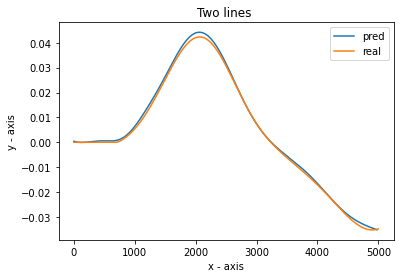

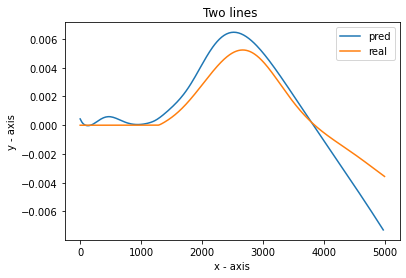

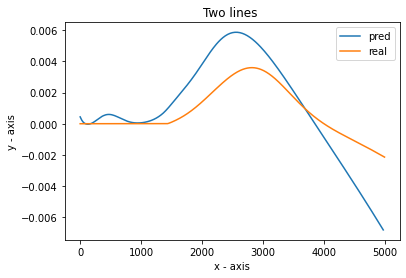

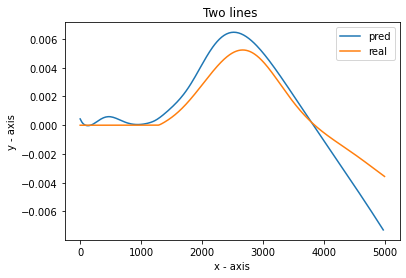

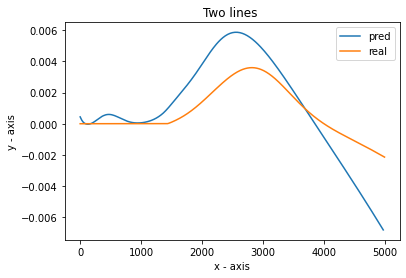

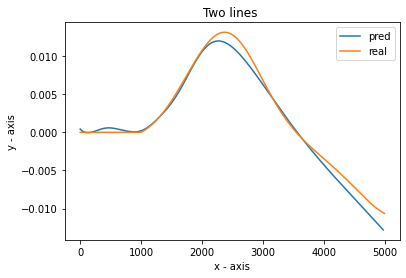

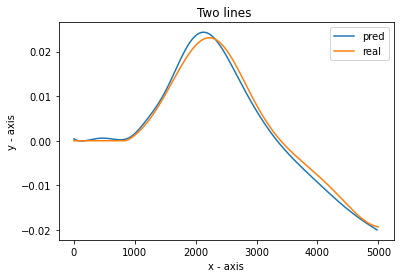

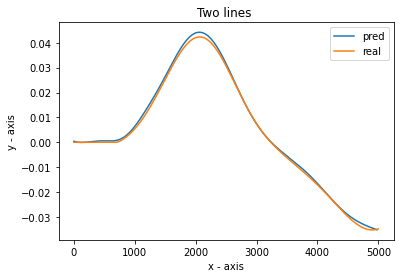

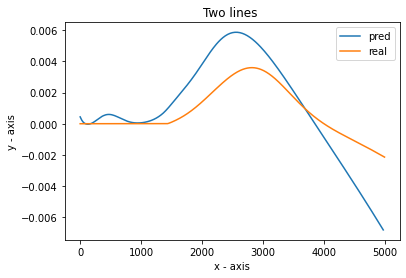

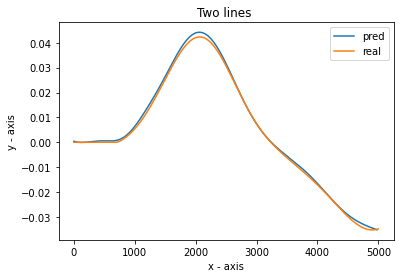

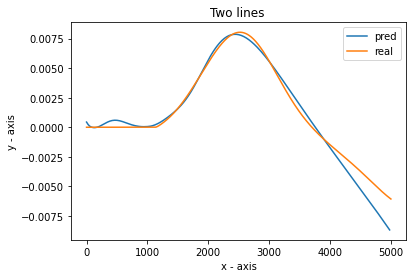

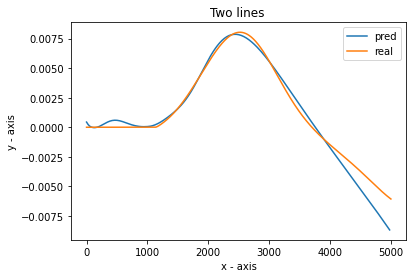

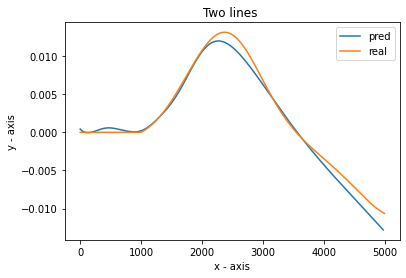

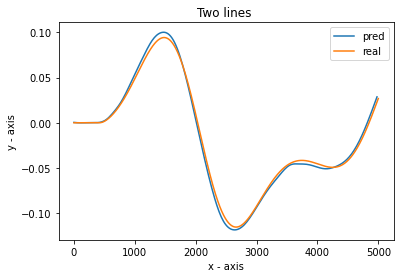

In [17]:
y_final_pred = y_final.reshape(-1,1)
y_final_pred = scaler_X.inverse_transform(y_final_pred)
y_final_pred = y_final_pred.reshape(-1,5).reshape(-1,y_final.shape[1],5)
y_pred1 = y_final_pred[:,:,0]
y_real1 = y_test_final[:,:,0]
for i in range(14):
    plt.plot(y_pred1[i], label = "pred")
    plt.plot(y_real1[i], label = "real")
# naming the x axis

    plt.xlabel('x - axis')

# naming the y axis

    plt.ylabel('y - axis')

# giving a title to my graph

    plt.title('Two lines ')

# show a legend on the plot

    plt.legend()

# function to show the plot

    plt.show()

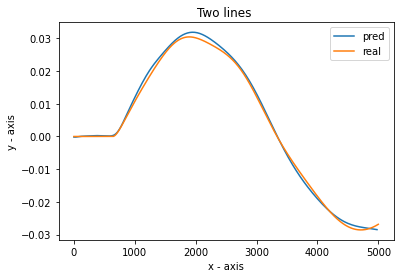

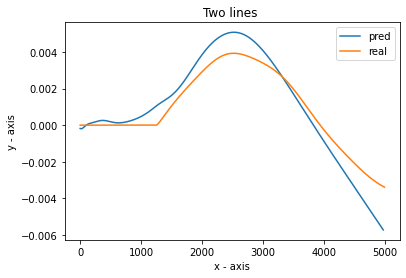

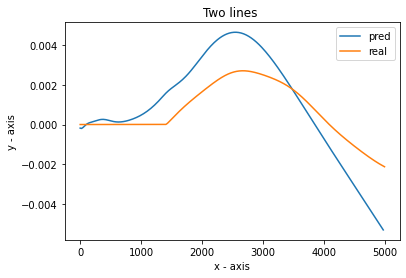

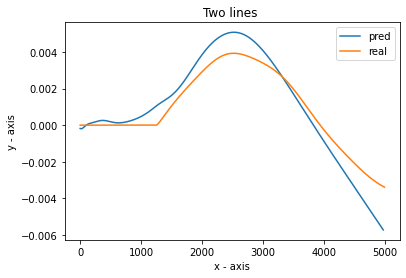

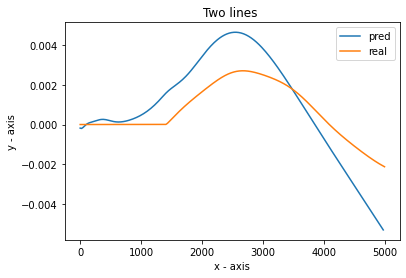

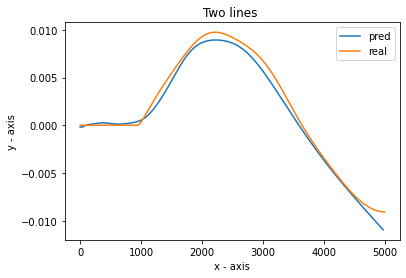

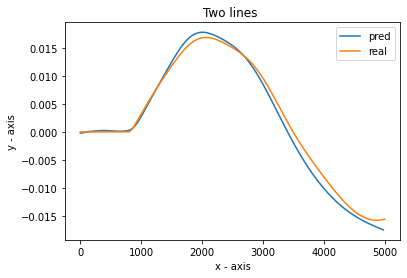

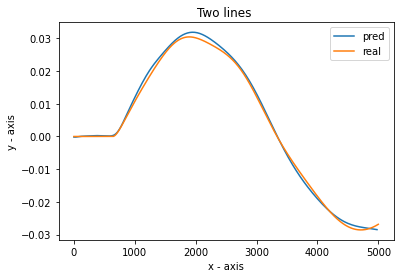

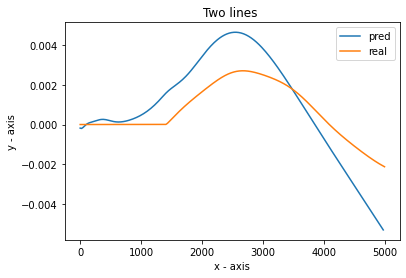

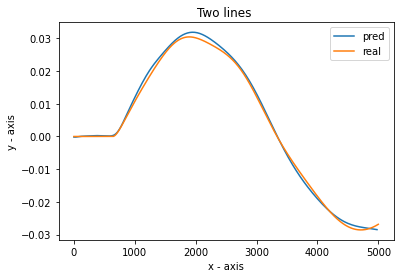

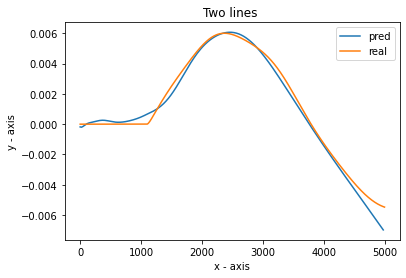

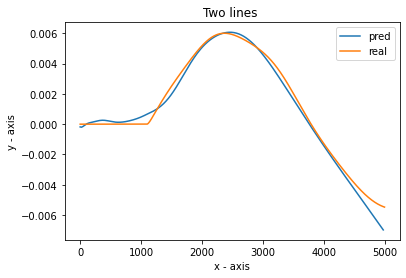

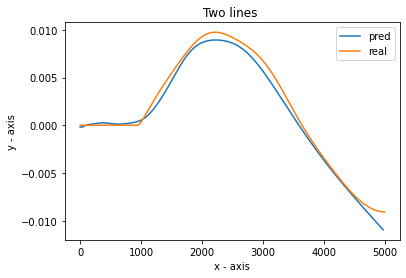

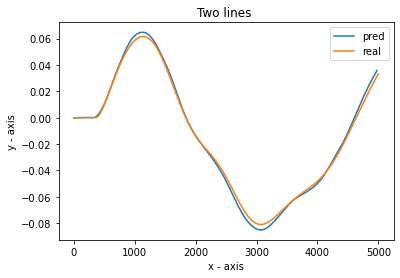

In [18]:
y_pred2 = y_final_pred[:,:,1]
y_real2 = y_test_final[:,:,1]
for i in range(14):
    plt.plot(y_pred2[i], label = "pred")
    plt.plot(y_real2[i], label = "real")
# naming the x axis

    plt.xlabel('x - axis')

# naming the y axis

    plt.ylabel('y - axis')

# giving a title to my graph

    plt.title('Two lines ')

# show a legend on the plot

    plt.legend()

# function to show the plot

    plt.show()

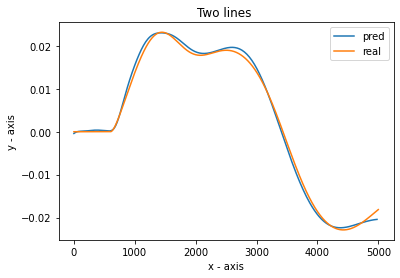

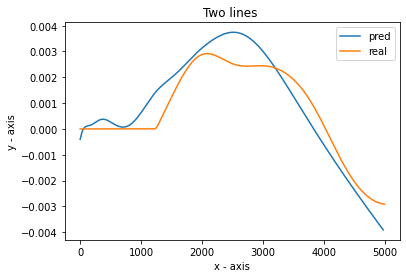

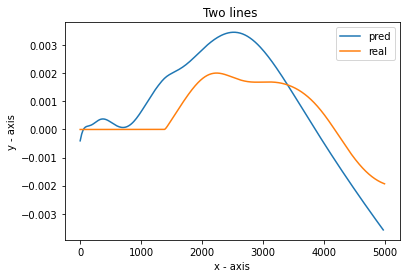

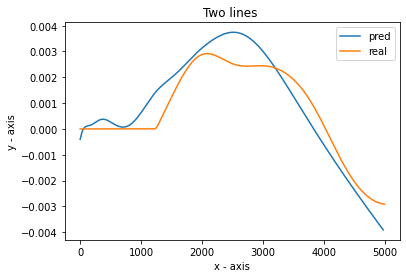

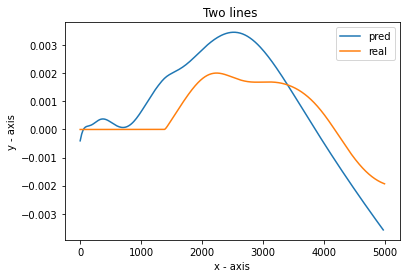

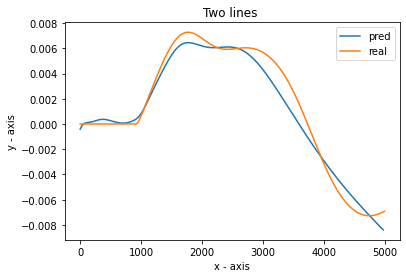

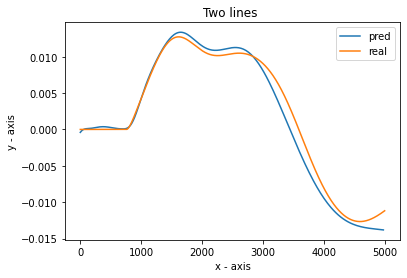

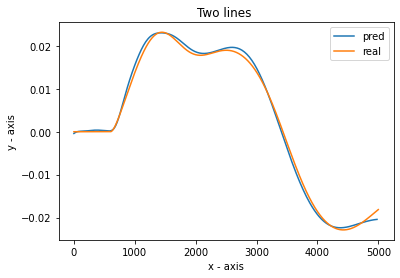

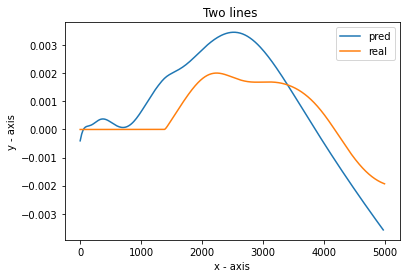

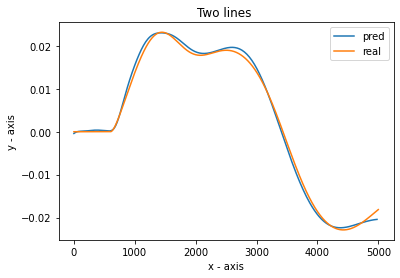

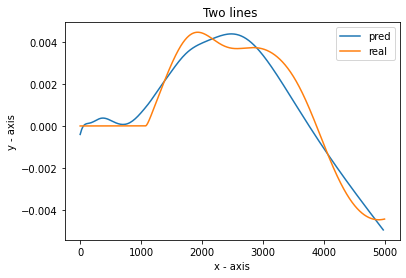

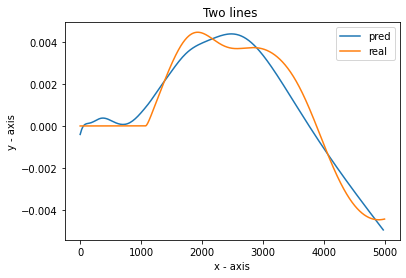

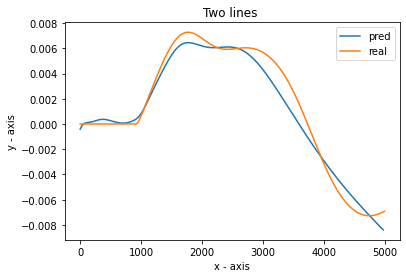

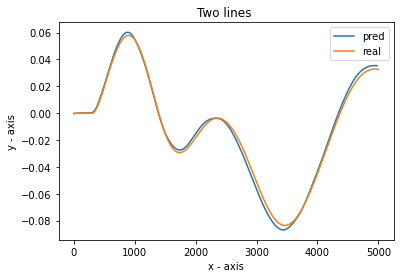

In [19]:
y_pred3 = y_final_pred[:,:,2]
y_real3 = y_test_final[:,:,2]
for i in range(14):
    plt.plot(y_pred3[i], label = "pred")
    plt.plot(y_real3[i], label = "real")
# naming the x axis

    plt.xlabel('x - axis')

# naming the y axis

    plt.ylabel('y - axis')

# giving a title to my graph

    plt.title('Two lines ')

# show a legend on the plot

    plt.legend()

# function to show the plot

    plt.show()

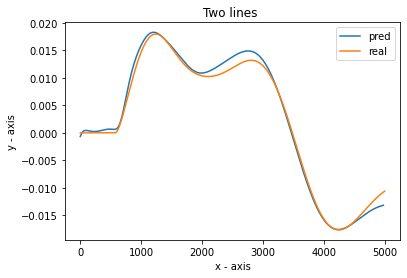

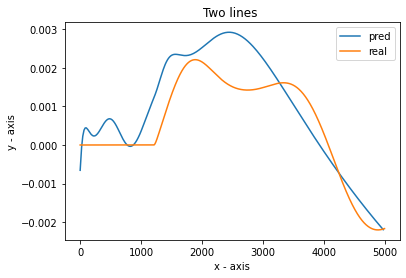

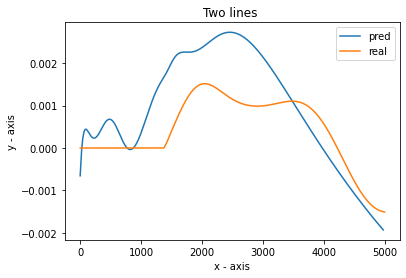

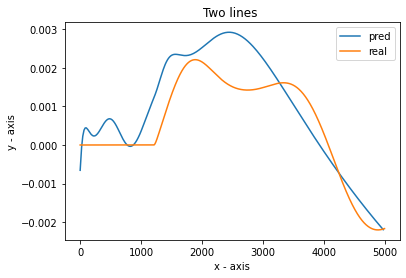

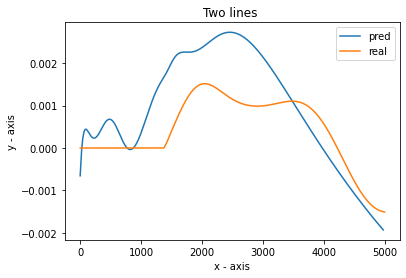

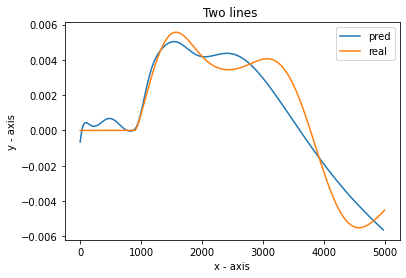

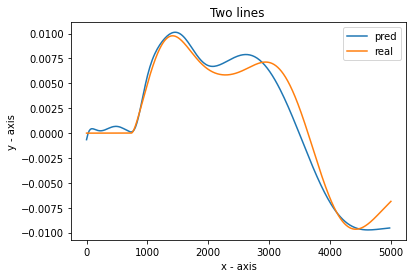

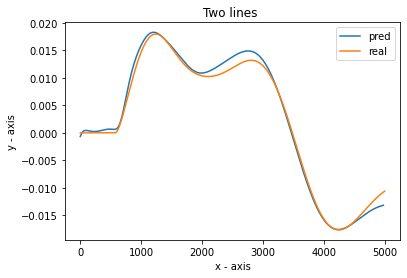

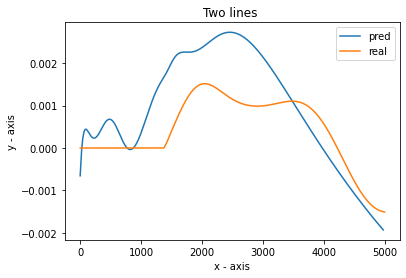

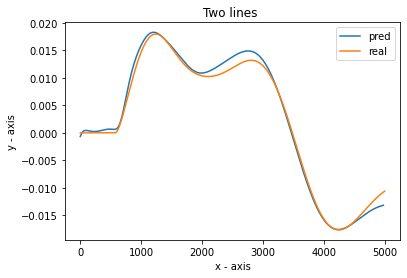

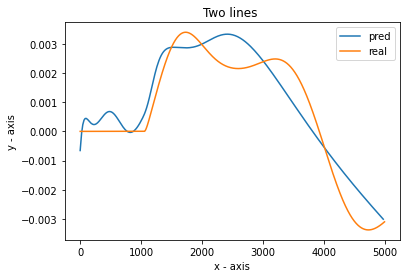

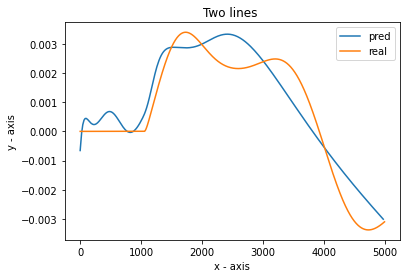

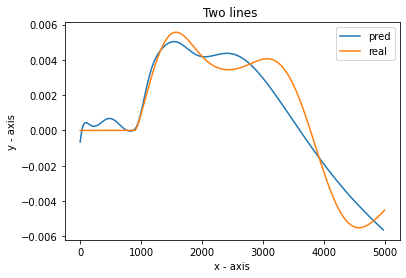

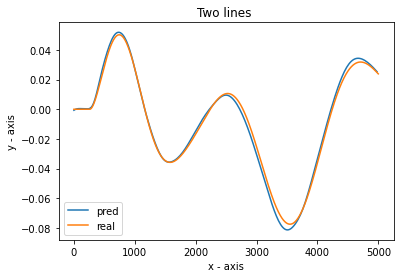

In [20]:
y_pred4 = y_final_pred[:,:,3]
y_real4 = y_test_final[:,:,3]
for i in range(14):
    plt.plot(y_pred4[i], label = "pred")
    plt.plot(y_real4[i], label = "real")
# naming the x axis

    plt.xlabel('x - axis')

# naming the y axis

    plt.ylabel('y - axis')

# giving a title to my graph

    plt.title('Two lines ')

# show a legend on the plot

    plt.legend()

# function to show the plot

    plt.show()

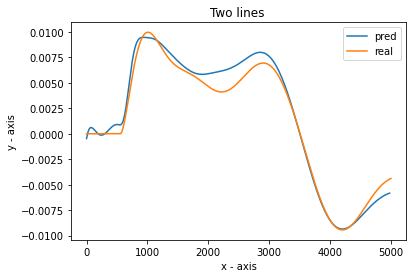

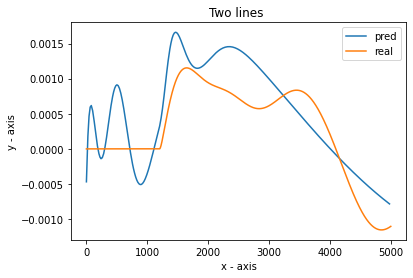

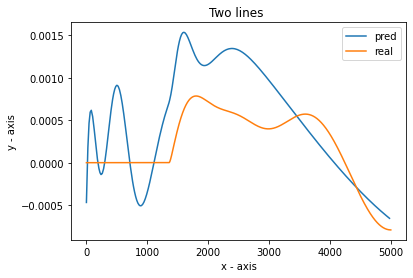

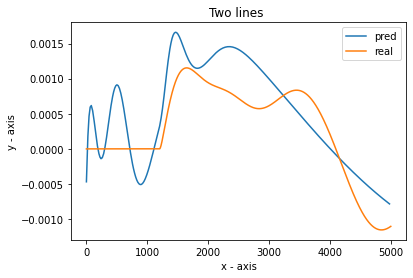

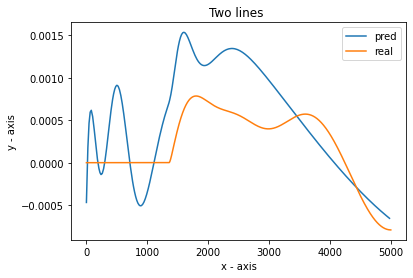

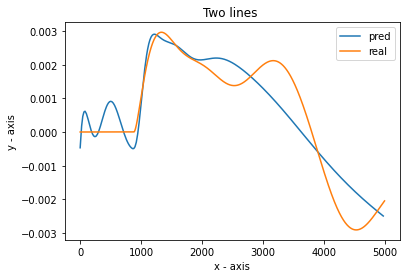

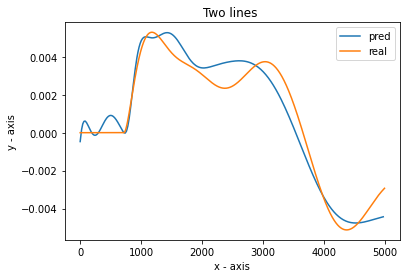

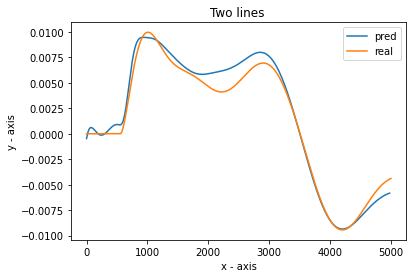

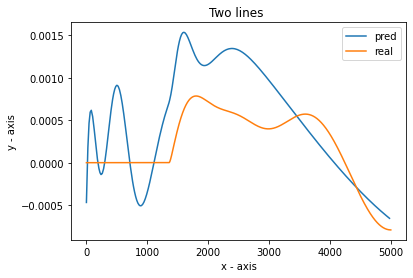

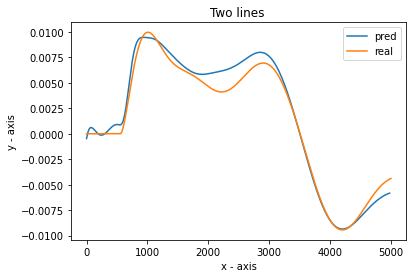

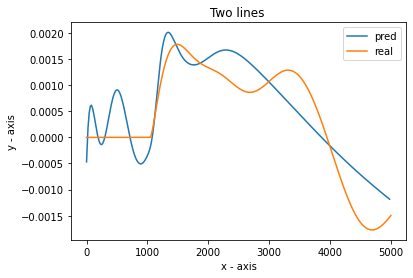

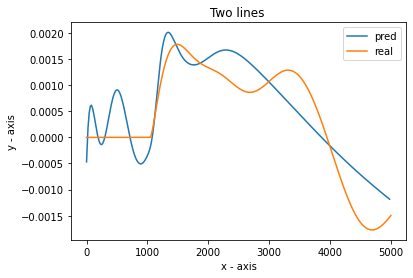

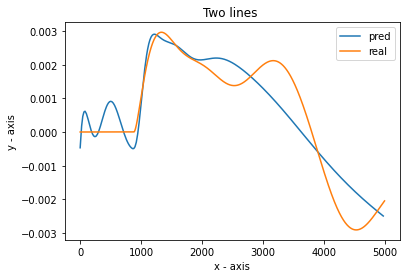

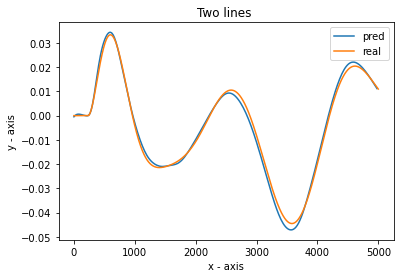

In [21]:
y_pred5 = y_final_pred[:,:,4]
y_real5 = y_test_final[:,:,4]
for i in range(14):
    plt.plot(y_pred5[i], label = "pred")
    plt.plot(y_real5[i], label = "real")
# naming the x axis

    plt.xlabel('x - axis')

# naming the y axis

    plt.ylabel('y - axis')

# giving a title to my graph

    plt.title('Two lines ')

# show a legend on the plot

    plt.legend()

# function to show the plot

    plt.show()